In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib
import ipyparams

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import func_optimize as fo
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
import neurolib.dashboard.layout as layout
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)

<IPython.core.display.Javascript object>

not here


In [2]:
aln = ALNModel()
N = aln.params.N

data.set_parameters(aln)

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [3]:
##### LOAD POINTS
data_file = '..' + os.sep + 'bi.pickle'
with open(data_file,'rb') as f:
    load_array= pickle.load(f)
exc = load_array[0]
inh = load_array[1]

savepath = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'FENS' + os.sep + 'poster' + os.sep + 'print' + os.sep + 'images')

In [4]:
bestControl = [None] * len(exc)

In [5]:
initVars = [None] * len(exc)
cost_uncontrolled = [None] * len(exc)

In [6]:
dur_pre = 10
dur_post = 10
dur = 200.
dt = aln.params.dt
T = int(1 + dur / dt)

max_it = 10
init_it = 10
prec_vars = [0,1]
trans_time = 0.9

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-32
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

maxC = [5., -5., 0.18, 0.]
n_dur = int(np.around(dur/aln.params.dt + 1.,1))
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

nb = ipyparams.notebook_name
print('nb = ', nb)

case = str(nb[4])

read_file = '..' + os.sep + 'data_final_2' + os.sep + 'control_' + case + '.pickle'
    
i_range = [50]
i = 50

nb =  task3_point50_compare.ipynb


In [7]:
if os.path.isfile(read_file) :
    print("file found")
    
    with open(read_file,'rb') as f:
        load_array = pickle.load(f)

    bestControl = load_array[0]
    
init_control_noisefree = [None] * len(exc)
for i in i_range:
    init_control_noisefree[i] = bestControl[i].copy()

file found


In [38]:
sigma_ou_array = [0.01, 0.03, 0.1]
noise_realizations_array = [0,20,100]
noise_realizations_final = 10000

In [10]:
cost_final_mean = np.zeros(( 3,3 ))
target = [None] * 3
control_ = [ [None] * 3, [None] * 3, [None] * 3 ]
cost_ = [ [None] * 3, [None] * 3, [None] * 3 ]
cost_final = [ [None] * 3, [None] * 3, [None] * 3 ]

stable_state = np.zeros(( 3, 2,2,2, 2))

In [11]:
# get init vars without noise
aln = ALNModel()
data.set_parameters(aln)
aln.params.duration = 3000.

# initial without noise
control0 = aln.getZeroControl()
control0[0,0,:500] = 5.
aln.params.ext_exc_current = exc[i] * 5.
aln.params.ext_inh_current = inh[i] * 5.

aln.run(control=control0)

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars[i] = init_state_vars

stable_state[0,0,0,0,0] = aln.rates_exc[0,-1]
stable_state[0,0,0,1,0] = aln.rates_inh[0,-1]

control0 = aln.getZeroControl()
control0[0,0,:500] = -5.

aln.params.duration = 3000.
aln.run(control=control0)
stable_state[0,0,1,0,0] = aln.rates_exc[0,-1]
stable_state[0,0,1,1,0] = aln.rates_inh[0,-1]

aln.params.duration = dur
target_det = aln.getZeroTarget()
target_det[:,0,:] = aln.rates_exc[0,-1]
target_det[:,1,:] = aln.rates_inh[0,-1]

print('exc initial , final ', stable_state[0,0,0,0,0], stable_state[0,0,1,0,0])
print('inh initial , final ', stable_state[0,0,0,1,0], stable_state[0,0,1,1,0])

exc initial , final  39.92863296490006 2.339651407613867e-06
inh initial , final  107.75907077321249 41.918142394968584


In [12]:
# get target states with noise

i = 50

print("------- ", i, exc[i], inh[i])
aln.params.ext_exc_current = exc[i] * 5.
aln.params.ext_inh_current = inh[i] * 5.

-------  50 0.47500000000000014 0.6000000000000003


In [13]:
for i_sigma in range(len(sigma_ou_array)):
    
    sigma_ou = sigma_ou_array[i_sigma]
    aln.params.sigma_ou = sigma_ou
    

    aln.params.duration = dur
    control0 = aln.getZeroControl()
    control0[0,0,:500] = 5.

    target_rates_e = []
    target_rates_i = []

    stateswitchcount = 0

    for j in range(noise_realizations_final):
        aln.params.duration = dur
        aln.run(control=control0)
        if np.amin(aln.rates_exc[0,1000:]) < 1.:
            print("fell in down state, repeat")
            j -= 1
            stateswitchcount += 1
            if stateswitchcount > 0.1 * noise_realizations_final:
                break
            continue
        target_rates_e.append(aln.rates_exc[0,1000:])
        target_rates_i.append(aln.rates_inh[0,1000:])

    stable_state[i_sigma,1,1,0,0] = np.mean(target_rates_e)
    stable_state[i_sigma,1,1,1,0] = np.mean(target_rates_i)
    stable_state[i_sigma,1,1,0,1] = np.std(target_rates_e)
    stable_state[i_sigma,1,1,1,1] = np.std(target_rates_i)


    aln.params.duration = 300.
    control0 = aln.getZeroControl()
    control0[0,0,:500] = -5.

    target_rates_e = []
    target_rates_i = []

    stateswitchcount = 0

    for j in range(noise_realizations_final):
        aln.params.duration = 300.
        aln.run(control=control0)
        if np.amin(aln.rates_exc[0,1000:]) > 3.:
            print("fell in up state, repeat")
            j -= 1
            stateswitchcount += 1
            if stateswitchcount > 0.1 * noise_realizations_final:
                break
            continue
        target_rates_e.append(aln.rates_exc[0,1000:])
        target_rates_i.append(aln.rates_inh[0,1000:])

    aln.params.duration = dur
    target[i_sigma] = aln.getZeroTarget()
    target[i_sigma][:,0,:] = np.mean(target_rates_e)
    target[i_sigma][:,1,:] = np.mean(target_rates_i)

    stable_state[i_sigma,1,0,0,0] = np.mean(target_rates_e)
    stable_state[i_sigma,1,0,1,0] = np.mean(target_rates_i)
    stable_state[i_sigma,1,0,0,1] = np.std(target_rates_e)
    stable_state[i_sigma,1,0,1,1] = np.std(target_rates_i)

In [14]:
w_p = np.zeros((3))
for i_sigma in range(len(sigma_ou_array)):
    w_p[i_sigma] = 1. / ( ( stable_state[i_sigma,1,1,0,1] + stable_state[i_sigma,1,1,1,1] ) * (1. - trans_time) * dur )
w_e = 0.
w_s = 1.

aln.params.duration = dur
zero_init = aln.getZeroControl()

In [33]:
max_it = 10
init_it = 5
min_it = 8
i = 50
factor = [1.09, 1.21, 2.0]


for i_sigma in range(3):
    cost.setParams(w_p[i_sigma], w_e, w_s)
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        
        n_ = 0
        control_sum = np.zeros(( init_control_noisefree[i][:,:,:2201].shape ))
        
        print(noise_realizations)
        
        if i_noise != 0.:
            while n_  < noise_realizations:
            #while n_  < 30:
                
                print('--------', n_)

                setinit(initVars[i], aln)

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0], prec_variables_ = [0], transition_time_ = trans_time,
                    noise_real=0, init_params = initVars[i])
                
                if np.isnan(c_[-1]):
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue

                control_init = bestControl[:,:,100:-100].copy()
                setinit(initVars[i], aln)
                aln.params.duration = dur

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0,1], prec_variables_ = [0], transition_time_ = trans_time,
                    noise_real=0, init_params = initVars[i])
                
                if c_[min_it] == 0:
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue

                control_init = bestControl[:,:,100:-100].copy()
                setinit(initVars[i], aln)
                aln.params.duration = dur

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0,1], prec_variables_ = [0,1], transition_time_ = trans_time,
                    noise_real=0, init_params = initVars[i])
                
                if c_[min_it] == 0:
                    continue
                    
                if np.isnan(c_[-1]):
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue
                    
                control_sum += bestControl
                            
                n_ += 1
    

            control_[i_sigma][i_noise] = control_sum / noise_realizations
            
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[i][:,:,1400:3601]
        
        aln.params.duration = dur
        setinit(initVars[i], aln)

        init_control = aln.getZeroControl()           
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = np.zeros(( noise_realizations_final ))

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final[n_] += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )
            cost_final[n_] += cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        cost_final_mean[i_sigma, i_noise] = np.mean(cost_final)
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.05214890598130851 0.0 1.0
0
mean =  3.0100167316298188
20
-------- 0
interpolate adjoint :  True True True
initial cost =  818.4501320192044
RUN  0 , total integrated cost =  818.4501320192044
Gradient descend method:  None
RUN  1 , total integrated cost =  9.643455572654767
RUN  2 , total integrated cost =  9.211930219586028
RUN  3 , total integrated cost =  8.204584714973441
RUN  4 , total integrated cost =  6.165567406066667
RUN  5 , total integrated cost =  5.648098362042176
RUN  5 , total integrated cost =  5.648098362042176
Improved over  5  iterations in  0.171050027012825  seconds by  99.30990317661654  percent.
interpolate adjoint :  True True True
initial cost =  5.660183989518804
RUN  0 , total integrated cost =  5.660183989518804
Gradient descend method:  None
RUN  1 , total integrated cost =  3.9968843217564483
RUN  2 , total integrated cost =  3.931852940257117
RUN  3 , total integrated cost =  3.901354030906611
RUN  4 , total integrated cost =  3.7676

RUN  1 , total integrated cost =  7.294949720687036
RUN  2 , total integrated cost =  7.066420325913518
RUN  3 , total integrated cost =  7.12323167142542
RUN  4 , total integrated cost =  7.051599195519706
RUN  5 , total integrated cost =  7.04676384710261
RUN  6 , total integrated cost =  7.084545114570026
RUN  7 , total integrated cost =  7.047111318380389
RUN  8 , total integrated cost =  7.042637508776361
RUN  9 , total integrated cost =  7.001960182444567
RUN  10 , total integrated cost =  6.9195250616913295
RUN  10 , total integrated cost =  6.9195250616913295
Improved over  10  iterations in  0.8016371169942431  seconds by  96.08783364768622  percent.
-------- 4
interpolate adjoint :  True True True
initial cost =  829.1710972657088
RUN  0 , total integrated cost =  829.1710972657088
Gradient descend method:  None
RUN  1 , total integrated cost =  9.720169230012385
RUN  2 , total integrated cost =  8.283136388690775
RUN  3 , total integrated cost =  6.312589545974421
RUN  4 , t

RUN  4 , total integrated cost =  3.7879951201812934
RUN  5 , total integrated cost =  3.7585397735507073
RUN  6 , total integrated cost =  3.7062219908537206
RUN  7 , total integrated cost =  3.7641227220811544
RUN  8 , total integrated cost =  3.673081467922378
RUN  9 , total integrated cost =  3.5311095096499354
RUN  10 , total integrated cost =  3.5382948067322917
RUN  10 , total integrated cost =  3.5382948067322917
Improved over  10  iterations in  0.7941168050165288  seconds by  31.74513037172433  percent.
interpolate adjoint :  True True True
initial cost =  215.59011675387916
RUN  0 , total integrated cost =  215.59011675387916
Gradient descend method:  None
RUN  1 , total integrated cost =  8.033721455791564
RUN  2 , total integrated cost =  7.222408168858303
RUN  3 , total integrated cost =  6.285178863595633
RUN  4 , total integrated cost =  5.477234528329843
RUN  5 , total integrated cost =  5.414303070871718
RUN  6 , total integrated cost =  5.208300539901376
RUN  7 , tot

RUN  1 , total integrated cost =  4.725560451783564
RUN  2 , total integrated cost =  4.326003070014252
RUN  3 , total integrated cost =  4.287312055942454
RUN  4 , total integrated cost =  4.028462407878807
RUN  5 , total integrated cost =  3.7119388314567656
RUN  6 , total integrated cost =  3.7165981094999596
RUN  7 , total integrated cost =  3.6766592589314855
RUN  8 , total integrated cost =  3.6603081982622294
RUN  9 , total integrated cost =  3.5979007098187212
RUN  10 , total integrated cost =  3.4086444131712077
RUN  10 , total integrated cost =  3.4086444131712077
Improved over  10  iterations in  0.6704988130368292  seconds by  32.33719874358805  percent.
interpolate adjoint :  True True True
initial cost =  230.24641287657366
RUN  0 , total integrated cost =  230.24641287657366
Gradient descend method:  None
RUN  1 , total integrated cost =  7.288021066887614
RUN  2 , total integrated cost =  6.866426325988821
RUN  3 , total integrated cost =  6.6648134879312435
RUN  4 , to

RUN  5 , total integrated cost =  5.070396084582357
RUN  5 , total integrated cost =  5.070396084582357
Improved over  5  iterations in  0.18709489598404616  seconds by  99.3899615414301  percent.
interpolate adjoint :  True True True
initial cost =  5.026126488701274
RUN  0 , total integrated cost =  5.026126488701274
Gradient descend method:  None
RUN  1 , total integrated cost =  4.684601357917712
RUN  2 , total integrated cost =  4.316404721995771
RUN  3 , total integrated cost =  4.236319039441841
RUN  4 , total integrated cost =  4.1016340126770015
RUN  5 , total integrated cost =  3.8875439109522936
RUN  6 , total integrated cost =  3.862787417478876
RUN  7 , total integrated cost =  3.7555704072013656
RUN  8 , total integrated cost =  3.673550976431537
RUN  9 , total integrated cost =  3.6055633177436746
RUN  10 , total integrated cost =  3.5913157578001313
RUN  10 , total integrated cost =  3.5913157578001313
Improved over  10  iterations in  0.715285355981905  seconds by  28.

RUN  8 , total integrated cost =  5.906631588825896
RUN  9 , total integrated cost =  5.755453205305366
RUN  10 , total integrated cost =  5.576566006518105
RUN  10 , total integrated cost =  5.576566006518105
Improved over  10  iterations in  0.9026871760142967  seconds by  97.8570994739302  percent.
-------- 19
interpolate adjoint :  True True True
initial cost =  806.9229558018236
RUN  0 , total integrated cost =  806.9229558018236
Gradient descend method:  None
RUN  1 , total integrated cost =  9.410044148319953
RUN  2 , total integrated cost =  8.224074081963407
RUN  3 , total integrated cost =  6.233932811893765
RUN  4 , total integrated cost =  5.707963150571585
RUN  5 , total integrated cost =  4.838543816153267
RUN  5 , total integrated cost =  4.838543816153267
Improved over  5  iterations in  0.16777040396118537  seconds by  99.40037102905998  percent.
interpolate adjoint :  True True True
initial cost =  5.165235716783212
RUN  0 , total integrated cost =  5.165235716783212


RUN  2 , total integrated cost =  7.322122788425611
RUN  3 , total integrated cost =  6.598314877432499
RUN  4 , total integrated cost =  6.428883650080517
RUN  5 , total integrated cost =  6.284663258485171
RUN  6 , total integrated cost =  6.095530275070528
RUN  7 , total integrated cost =  5.261516158596635
RUN  8 , total integrated cost =  4.663896270061897
RUN  9 , total integrated cost =  4.680063507378196
RUN  10 , total integrated cost =  4.715524349578636
RUN  10 , total integrated cost =  4.715524349578636
Improved over  10  iterations in  0.808082583011128  seconds by  97.74625453435655  percent.
-------- 2
interpolate adjoint :  True True True
initial cost =  843.5701099617207
RUN  0 , total integrated cost =  843.5701099617207
Gradient descend method:  None
RUN  1 , total integrated cost =  9.625717559694465
RUN  2 , total integrated cost =  8.324224196837589
RUN  3 , total integrated cost =  6.185116775344308
RUN  4 , total integrated cost =  5.690263840189422
RUN  5 , to

RUN  5 , total integrated cost =  3.6552979092146023
RUN  6 , total integrated cost =  3.639636388545986
RUN  7 , total integrated cost =  3.605338743752231
RUN  8 , total integrated cost =  3.431865682159689
RUN  9 , total integrated cost =  3.459216732431022
RUN  10 , total integrated cost =  3.4196542315744423
RUN  10 , total integrated cost =  3.4196542315744423
Improved over  10  iterations in  0.6804946790216491  seconds by  30.21340300572028  percent.
interpolate adjoint :  True True True
initial cost =  202.02834427896215
RUN  0 , total integrated cost =  202.02834427896215
Gradient descend method:  None
RUN  1 , total integrated cost =  7.169886731568437
RUN  2 , total integrated cost =  6.6725856269647155
RUN  3 , total integrated cost =  6.674131079121878
RUN  4 , total integrated cost =  6.672431731353934
step size too small or too large
RUN  5 , total integrated cost =  6.596909014668331
RUN  6 , total integrated cost =  5.033849972452735
RUN  7 , total integrated cost =  

RUN  1 , total integrated cost =  4.060615094769731
RUN  2 , total integrated cost =  3.8868545295487418
RUN  3 , total integrated cost =  3.5417014739474277
RUN  4 , total integrated cost =  3.4727395304314026
RUN  5 , total integrated cost =  3.4371062144284474
RUN  6 , total integrated cost =  3.444632404350693
RUN  7 , total integrated cost =  3.4330122868683075
RUN  8 , total integrated cost =  3.475230817349326
RUN  9 , total integrated cost =  3.4339207182206564
RUN  10 , total integrated cost =  3.453754635211478
RUN  10 , total integrated cost =  3.453754635211478
Improved over  10  iterations in  0.7540622539818287  seconds by  23.32666605844865  percent.
interpolate adjoint :  True True True
initial cost =  144.4479499718357
RUN  0 , total integrated cost =  144.4479499718357
Gradient descend method:  None
RUN  1 , total integrated cost =  6.96968095312303
RUN  2 , total integrated cost =  6.3985716392227605
RUN  3 , total integrated cost =  5.539547300576603
RUN  4 , total 

RUN  9 , total integrated cost =  3.482617866864429
RUN  10 , total integrated cost =  3.480522775574771
RUN  10 , total integrated cost =  3.480522775574771
Improved over  10  iterations in  0.7039851250010543  seconds by  21.74880247901359  percent.
interpolate adjoint :  True True True
initial cost =  221.4785816032934
RUN  0 , total integrated cost =  221.4785816032934
Gradient descend method:  None
RUN  1 , total integrated cost =  7.909560106360527
RUN  2 , total integrated cost =  7.249021708018295
RUN  3 , total integrated cost =  6.499789578819387
RUN  4 , total integrated cost =  5.740166831554761
RUN  5 , total integrated cost =  5.23654787964915
RUN  6 , total integrated cost =  4.847711996558407
RUN  7 , total integrated cost =  4.792206070796937
RUN  8 , total integrated cost =  4.591206972544574
RUN  9 , total integrated cost =  4.48961087437054
RUN  10 , total integrated cost =  4.520180695391348
RUN  10 , total integrated cost =  4.520180695391348
Improved over  10  it

RUN  2 , total integrated cost =  4.17422670105747
RUN  3 , total integrated cost =  3.6084899221448694
RUN  4 , total integrated cost =  3.5696118556467544
RUN  5 , total integrated cost =  3.544528979035597
RUN  6 , total integrated cost =  3.5903935192729675
RUN  7 , total integrated cost =  3.5756990201474412
RUN  8 , total integrated cost =  3.525087744349285
RUN  9 , total integrated cost =  3.5348229023917406
RUN  10 , total integrated cost =  3.5215952031342432
RUN  10 , total integrated cost =  3.5215952031342432
Improved over  10  iterations in  0.7595888539799489  seconds by  20.826545084230986  percent.
interpolate adjoint :  True True True
initial cost =  184.6116567769803
RUN  0 , total integrated cost =  184.6116567769803
Gradient descend method:  None
RUN  1 , total integrated cost =  7.253733292407057
RUN  2 , total integrated cost =  7.022220059482932
RUN  3 , total integrated cost =  6.3335681458792195
RUN  4 , total integrated cost =  6.026981261797632
RUN  5 , tota

RUN  2 , total integrated cost =  8.281616924552607
RUN  3 , total integrated cost =  6.224824844488908
RUN  4 , total integrated cost =  5.682344722668363
RUN  5 , total integrated cost =  4.849568967681185
RUN  5 , total integrated cost =  4.849568967681185
Improved over  5  iterations in  0.21113549603614956  seconds by  99.4092416696842  percent.
interpolate adjoint :  True True True
initial cost =  4.880566887077156
RUN  0 , total integrated cost =  4.880566887077156
Gradient descend method:  None
RUN  1 , total integrated cost =  4.631762431257155
RUN  2 , total integrated cost =  4.352295513606565
RUN  3 , total integrated cost =  4.144229465402461
RUN  4 , total integrated cost =  3.746119843266096
RUN  5 , total integrated cost =  3.5964267066916635
RUN  6 , total integrated cost =  3.6084860234443807
RUN  7 , total integrated cost =  3.5964639491797623
RUN  8 , total integrated cost =  3.528600064866433
RUN  9 , total integrated cost =  3.5396241758072526
RUN  10 , total inte

RUN  4 , total integrated cost =  5.02112256080947
RUN  5 , total integrated cost =  4.840970876304129
RUN  6 , total integrated cost =  4.837026473450555
RUN  7 , total integrated cost =  4.768512235034097
RUN  8 , total integrated cost =  4.75245806627561
RUN  9 , total integrated cost =  4.647855717321878
RUN  10 , total integrated cost =  4.658720891123145
RUN  10 , total integrated cost =  4.658720891123145
Improved over  10  iterations in  0.8255663639865816  seconds by  98.2150481882703  percent.
-------- 24
interpolate adjoint :  True True True
initial cost =  854.4267505984842
RUN  0 , total integrated cost =  854.4267505984842
Gradient descend method:  None
RUN  1 , total integrated cost =  9.842766681604132
RUN  2 , total integrated cost =  7.8473512347655285
RUN  3 , total integrated cost =  6.105391945724675
RUN  4 , total integrated cost =  5.714495735961073
RUN  5 , total integrated cost =  5.039652293646439
RUN  5 , total integrated cost =  5.039652293646439
Improved ov

RUN  7 , total integrated cost =  3.4112051932920053
RUN  8 , total integrated cost =  3.34018091557166
RUN  9 , total integrated cost =  3.301489221186285
RUN  10 , total integrated cost =  3.344721196208375
RUN  10 , total integrated cost =  3.344721196208375
Improved over  10  iterations in  0.8217746540321968  seconds by  33.772794200883666  percent.
interpolate adjoint :  True True True
initial cost =  143.80536920993953
RUN  0 , total integrated cost =  143.80536920993953
Gradient descend method:  None
RUN  1 , total integrated cost =  6.521044924614367
RUN  2 , total integrated cost =  5.182857426000774
RUN  3 , total integrated cost =  4.900187330123108
RUN  4 , total integrated cost =  4.815706048281341
RUN  5 , total integrated cost =  4.7474206562405845
RUN  6 , total integrated cost =  4.76581053247906
RUN  7 , total integrated cost =  4.760540909666347
RUN  8 , total integrated cost =  4.7608434957560615
RUN  9 , total integrated cost =  4.693423302796819
RUN  10 , total i

interpolate adjoint :  True True True
initial cost =  4.946140672648583
RUN  0 , total integrated cost =  4.946140672648583
Gradient descend method:  None
RUN  1 , total integrated cost =  4.417211941797843
RUN  2 , total integrated cost =  4.011488269458396
RUN  3 , total integrated cost =  3.842719771789818
RUN  4 , total integrated cost =  3.824880918467574
RUN  5 , total integrated cost =  3.715820896022093
RUN  6 , total integrated cost =  3.7428135735962536
RUN  7 , total integrated cost =  3.7279230785252806
RUN  8 , total integrated cost =  3.457057101247348
RUN  9 , total integrated cost =  3.4182957413189636
RUN  10 , total integrated cost =  3.4227890890942936
RUN  10 , total integrated cost =  3.4227890890942936
Improved over  10  iterations in  0.680705078993924  seconds by  30.798792116410993  percent.
interpolate adjoint :  True True True
initial cost =  108.31281042882523
RUN  0 , total integrated cost =  108.31281042882523
Gradient descend method:  None
RUN  1 , total 

RUN  1 , total integrated cost =  9.763773490476753
RUN  2 , total integrated cost =  8.386596562298433
RUN  3 , total integrated cost =  6.207149008411662
RUN  4 , total integrated cost =  5.782621263915189
RUN  5 , total integrated cost =  4.783421193258827
RUN  5 , total integrated cost =  4.783421193258827
Improved over  5  iterations in  0.20641506102401763  seconds by  99.45246459431354  percent.
interpolate adjoint :  True True True
initial cost =  4.779594719206468
RUN  0 , total integrated cost =  4.779594719206468
Gradient descend method:  None
RUN  1 , total integrated cost =  4.4699597950643986
RUN  2 , total integrated cost =  4.386874160668855
RUN  3 , total integrated cost =  4.103840820485935
RUN  4 , total integrated cost =  4.119392491472829
RUN  5 , total integrated cost =  3.982542976005041
RUN  6 , total integrated cost =  3.876583086978793
RUN  7 , total integrated cost =  3.7384961898174565
RUN  8 , total integrated cost =  3.659803250340981
RUN  9 , total integr

RUN  9 , total integrated cost =  4.50594574908223
RUN  10 , total integrated cost =  4.52810291549682
RUN  10 , total integrated cost =  4.52810291549682
Improved over  10  iterations in  0.7424603559775278  seconds by  97.52954477747147  percent.
-------- 37
interpolate adjoint :  True True True
initial cost =  803.8959979172761
RUN  0 , total integrated cost =  803.8959979172761
Gradient descend method:  None
RUN  1 , total integrated cost =  9.498276619112508
RUN  2 , total integrated cost =  8.262224986888578
RUN  3 , total integrated cost =  6.2082842103579345
RUN  4 , total integrated cost =  5.272320081970444
RUN  5 , total integrated cost =  4.3572420610186375
RUN  5 , total integrated cost =  4.3572420610186375
Improved over  5  iterations in  0.16704973200103268  seconds by  99.4579843571423  percent.
interpolate adjoint :  True True True
initial cost =  4.469599225744961
RUN  0 , total integrated cost =  4.469599225744961
Gradient descend method:  None
RUN  1 , total integr

RUN  1 , total integrated cost =  9.595071770115736
RUN  2 , total integrated cost =  8.36067945208801
RUN  3 , total integrated cost =  5.896303695568944
RUN  4 , total integrated cost =  5.54186517130055
RUN  5 , total integrated cost =  5.119269598600521
RUN  5 , total integrated cost =  5.119269598600521
Improved over  5  iterations in  0.22202583105536178  seconds by  99.39904655928723  percent.
interpolate adjoint :  True True True
initial cost =  5.193398259770421
RUN  0 , total integrated cost =  5.193398259770421
Gradient descend method:  None
RUN  1 , total integrated cost =  3.946751809436468
RUN  2 , total integrated cost =  3.775651354979252
RUN  3 , total integrated cost =  3.7862650772189825
RUN  4 , total integrated cost =  3.65329435767305
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  3.611489863234816
RUN  6 , total integrated cost =  3.6627687116907124
RUN  7 , total integrated cost =  3.611720450141613
RUN  8 , t

RUN  5 , total integrated cost =  4.534521446986235
RUN  6 , total integrated cost =  4.594080278088732
RUN  7 , total integrated cost =  4.506291758893907
RUN  8 , total integrated cost =  4.364469123447538
RUN  9 , total integrated cost =  4.390286080714635
RUN  10 , total integrated cost =  4.392828685714403
RUN  10 , total integrated cost =  4.392828685714403
Improved over  10  iterations in  0.9082537749782205  seconds by  98.04932705075684  percent.
-------- 44
interpolate adjoint :  True True True
initial cost =  827.7740887372098
RUN  0 , total integrated cost =  827.7740887372098
Gradient descend method:  None
RUN  1 , total integrated cost =  9.399772129249385
RUN  2 , total integrated cost =  8.225174758120554
RUN  3 , total integrated cost =  6.256022262933079
RUN  4 , total integrated cost =  5.81821779637209
RUN  5 , total integrated cost =  5.133069277246814
RUN  5 , total integrated cost =  5.133069277246814
Improved over  5  iterations in  0.19445088697830215  seconds 

RUN  7 , total integrated cost =  3.6358396755172397
RUN  8 , total integrated cost =  3.3344732091812808
RUN  9 , total integrated cost =  3.3859312309656007
RUN  10 , total integrated cost =  3.3321984868175902
RUN  10 , total integrated cost =  3.3321984868175902
Improved over  10  iterations in  0.9031539410352707  seconds by  28.84604866840303  percent.
interpolate adjoint :  True True True
initial cost =  177.78076652630298
RUN  0 , total integrated cost =  177.78076652630298
Gradient descend method:  None
RUN  1 , total integrated cost =  6.418963972664262
RUN  2 , total integrated cost =  5.796640554109127
RUN  3 , total integrated cost =  5.774784055044977
RUN  4 , total integrated cost =  4.9171075945302105
RUN  5 , total integrated cost =  4.846872833921799
RUN  6 , total integrated cost =  4.889642286853926
RUN  7 , total integrated cost =  4.681275532627293
RUN  8 , total integrated cost =  4.710507992353013
RUN  9 , total integrated cost =  4.692119578890422
RUN  10 , tot

RUN  5 , total integrated cost =  4.213705553181977
RUN  5 , total integrated cost =  4.213705553181977
Improved over  5  iterations in  0.18107657099608332  seconds by  99.49570637512116  percent.
interpolate adjoint :  True True True
initial cost =  4.241141638141524
RUN  0 , total integrated cost =  4.241141638141524
Gradient descend method:  None
RUN  1 , total integrated cost =  3.9355438697909046
RUN  2 , total integrated cost =  3.9141633558342326
RUN  3 , total integrated cost =  3.824688968464049
RUN  4 , total integrated cost =  3.8171501094255236
RUN  5 , total integrated cost =  3.8235073024406603
RUN  6 , total integrated cost =  3.7324287746621954
RUN  7 , total integrated cost =  3.7293872250136206
Control only changes marginally.
RUN  7 , total integrated cost =  3.7293872250136206
Improved over  7  iterations in  0.8880426209652796  seconds by  12.066430616831639  percent.
-------- 51
interpolate adjoint :  True True True
initial cost =  833.9648885915245
RUN  0 , tota

RUN  10 , total integrated cost =  4.449037773134943
RUN  10 , total integrated cost =  4.449037773134943
Improved over  10  iterations in  0.8355686080176383  seconds by  98.22064034294893  percent.
-------- 53
interpolate adjoint :  True True True
initial cost =  819.8393287715737
RUN  0 , total integrated cost =  819.8393287715737
Gradient descend method:  None
RUN  1 , total integrated cost =  9.588047380851002
RUN  2 , total integrated cost =  8.239547555613505
RUN  3 , total integrated cost =  5.979119636954186
RUN  4 , total integrated cost =  5.40510395766199
RUN  5 , total integrated cost =  4.393126644952422
RUN  5 , total integrated cost =  4.393126644952422
Improved over  5  iterations in  0.18562388903228566  seconds by  99.46414785302689  percent.
interpolate adjoint :  True True True
initial cost =  4.567745647256234
RUN  0 , total integrated cost =  4.567745647256234
Gradient descend method:  None
RUN  1 , total integrated cost =  4.272777562319761
RUN  2 , total integr

RUN  1 , total integrated cost =  5.801258698903517
RUN  2 , total integrated cost =  5.168841483342894
RUN  3 , total integrated cost =  5.103481699040669
RUN  4 , total integrated cost =  5.095557573212656
RUN  5 , total integrated cost =  5.0265748509767
RUN  6 , total integrated cost =  4.249103208844644
step size too small or too large
RUN  7 , total integrated cost =  4.068582804343933
Control only changes marginally.
RUN  7 , total integrated cost =  4.068582804343933
Improved over  7  iterations in  0.702695025014691  seconds by  96.9588188843687  percent.
-------- 56
interpolate adjoint :  True True True
initial cost =  811.0800645671441
RUN  0 , total integrated cost =  811.0800645671441
Gradient descend method:  None
RUN  1 , total integrated cost =  9.658132374431345
RUN  2 , total integrated cost =  8.168581546153774
RUN  3 , total integrated cost =  6.103807775055056
RUN  4 , total integrated cost =  5.631182198077492
RUN  5 , total integrated cost =  4.975112551387646
RU

RUN  6 , total integrated cost =  4.427701220869518
RUN  7 , total integrated cost =  4.296869572690909
step size too small or too large
step size too small or too large
RUN  8 , total integrated cost =  4.25716754229119
RUN  9 , total integrated cost =  4.27825468342813
RUN  10 , total integrated cost =  3.882559922220479
RUN  10 , total integrated cost =  3.882559922220479
Improved over  10  iterations in  1.0641346169868484  seconds by  98.08606910417497  percent.
-------- 59
interpolate adjoint :  True True True
initial cost =  805.0914058005487
RUN  0 , total integrated cost =  805.0914058005487
Gradient descend method:  None
RUN  1 , total integrated cost =  9.399070062064183
RUN  2 , total integrated cost =  8.229232422874887
RUN  3 , total integrated cost =  6.096802817865857
RUN  4 , total integrated cost =  5.48203741604932
RUN  5 , total integrated cost =  4.4657969957664285
RUN  5 , total integrated cost =  4.4657969957664285
Improved over  5  iterations in  0.2107410180033

RUN  7 , total integrated cost =  3.81532307262052
RUN  8 , total integrated cost =  3.777567872358782
RUN  9 , total integrated cost =  3.640978807534224
RUN  10 , total integrated cost =  3.649525428616701
RUN  10 , total integrated cost =  3.649525428616701
Improved over  10  iterations in  0.6612594809848815  seconds by  27.515298950470964  percent.
interpolate adjoint :  True True True
initial cost =  237.49614583640687
RUN  0 , total integrated cost =  237.49614583640687
Gradient descend method:  None
RUN  1 , total integrated cost =  9.196491479876975
RUN  2 , total integrated cost =  7.065475215592553
RUN  3 , total integrated cost =  6.666055450313865
RUN  4 , total integrated cost =  6.2524976736629245
RUN  5 , total integrated cost =  6.089452265925598
RUN  6 , total integrated cost =  5.700256784644948
RUN  7 , total integrated cost =  5.382593835978608
RUN  8 , total integrated cost =  5.201124036744918
RUN  9 , total integrated cost =  5.159898466228627
RUN  10 , total in

RUN  1 , total integrated cost =  4.671321583579825
RUN  2 , total integrated cost =  4.337221732237121
RUN  3 , total integrated cost =  3.8418754162337625
RUN  4 , total integrated cost =  3.768287491310934
RUN  5 , total integrated cost =  3.6538519998145844
RUN  6 , total integrated cost =  3.687215246900583
RUN  7 , total integrated cost =  3.6447852465309776
RUN  8 , total integrated cost =  3.649869943949745
RUN  9 , total integrated cost =  3.6380744467511033
RUN  10 , total integrated cost =  3.6255584508591223
RUN  10 , total integrated cost =  3.6255584508591223
Improved over  10  iterations in  0.6909772649523802  seconds by  27.199377499298492  percent.
interpolate adjoint :  True True True
initial cost =  226.41948645455574
RUN  0 , total integrated cost =  226.41948645455574
Gradient descend method:  None
RUN  1 , total integrated cost =  8.873930859925718
RUN  2 , total integrated cost =  7.2112768328757495
RUN  3 , total integrated cost =  6.682345008896163
RUN  4 , to

RUN  1 , total integrated cost =  9.694791659783723
RUN  2 , total integrated cost =  7.856808073074595
RUN  3 , total integrated cost =  4.612268716101255
RUN  4 , total integrated cost =  4.332049354522065
RUN  5 , total integrated cost =  4.11214692388195
RUN  5 , total integrated cost =  4.11214692388195
Improved over  5  iterations in  0.17539732297882438  seconds by  99.51292507617694  percent.
interpolate adjoint :  True True True
initial cost =  4.137450188645054
RUN  0 , total integrated cost =  4.137450188645054
Gradient descend method:  None
RUN  1 , total integrated cost =  4.007791739644225
RUN  2 , total integrated cost =  3.92715763345673
RUN  3 , total integrated cost =  3.838967539229288
RUN  4 , total integrated cost =  3.840848827868103
RUN  5 , total integrated cost =  3.7456037294594404
RUN  6 , total integrated cost =  3.557776705793983
RUN  7 , total integrated cost =  3.428497974449127
RUN  8 , total integrated cost =  3.429247769931214
RUN  9 , total integrated

RUN  6 , total integrated cost =  5.083610226268411
RUN  7 , total integrated cost =  5.042356019542036
RUN  8 , total integrated cost =  5.040264716712577
RUN  9 , total integrated cost =  5.026120093971171
RUN  10 , total integrated cost =  4.9881527244505275
RUN  10 , total integrated cost =  4.9881527244505275
Improved over  10  iterations in  0.743587680044584  seconds by  96.59215140159652  percent.
-------- 74
interpolate adjoint :  True True True
initial cost =  819.4401965508758
RUN  0 , total integrated cost =  819.4401965508758
Gradient descend method:  None
RUN  1 , total integrated cost =  9.445531047759758
RUN  2 , total integrated cost =  8.250610747189127
RUN  3 , total integrated cost =  6.274374222913304
RUN  4 , total integrated cost =  5.666873732359957
RUN  5 , total integrated cost =  4.91824504837078
RUN  5 , total integrated cost =  4.91824504837078
Improved over  5  iterations in  0.16120592603692785  seconds by  99.39980427259094  percent.
interpolate adjoint 

RUN  7 , total integrated cost =  3.5340543690361113
RUN  8 , total integrated cost =  3.4874529037745794
RUN  9 , total integrated cost =  3.5432438218332503
RUN  10 , total integrated cost =  3.519264844980245
RUN  10 , total integrated cost =  3.519264844980245
Improved over  10  iterations in  0.7937676449655555  seconds by  12.449529139226158  percent.
interpolate adjoint :  True True True
initial cost =  206.77740682435694
RUN  0 , total integrated cost =  206.77740682435694
Gradient descend method:  None
RUN  1 , total integrated cost =  7.813839393868211
RUN  2 , total integrated cost =  7.031581889723067
RUN  3 , total integrated cost =  7.053502474196505
RUN  4 , total integrated cost =  6.946846947625347
RUN  5 , total integrated cost =  6.946904135317432
RUN  6 , total integrated cost =  6.937178921363793
RUN  7 , total integrated cost =  6.847202689526933
RUN  8 , total integrated cost =  6.834957542774933
RUN  9 , total integrated cost =  4.96120372581931
RUN  10 , total 

RUN  2 , total integrated cost =  3.6293403873521317
RUN  3 , total integrated cost =  3.5566352385824462
RUN  4 , total integrated cost =  3.584585625590141
RUN  5 , total integrated cost =  3.5998399718769547
RUN  6 , total integrated cost =  3.5867356987471526
RUN  7 , total integrated cost =  3.5925722607319814
RUN  8 , total integrated cost =  3.591697387020701
RUN  9 , total integrated cost =  3.612044476580885
RUN  10 , total integrated cost =  3.601086052146932
RUN  10 , total integrated cost =  3.601086052146932
Improved over  10  iterations in  0.6660635020234622  seconds by  24.53723381595377  percent.
interpolate adjoint :  True True True
initial cost =  182.56434790274454
RUN  0 , total integrated cost =  182.56434790274454
Gradient descend method:  None
RUN  1 , total integrated cost =  7.960552397773315
RUN  2 , total integrated cost =  7.413388519216431
RUN  3 , total integrated cost =  7.350128453551162
RUN  4 , total integrated cost =  7.237583559991442
RUN  5 , total

RUN  3 , total integrated cost =  6.147525303666413
RUN  4 , total integrated cost =  5.737022131855142
RUN  5 , total integrated cost =  5.0612869159189975
RUN  5 , total integrated cost =  5.0612869159189975
Improved over  5  iterations in  0.1656912580365315  seconds by  99.37839540318002  percent.
interpolate adjoint :  True True True
initial cost =  4.975157771459354
RUN  0 , total integrated cost =  4.975157771459354
Gradient descend method:  None
RUN  1 , total integrated cost =  4.715538965528992
RUN  2 , total integrated cost =  4.268583568037518
RUN  3 , total integrated cost =  3.826575363477741
RUN  4 , total integrated cost =  3.6794224941461113
RUN  5 , total integrated cost =  3.618666828540801
RUN  6 , total integrated cost =  3.5302084612115356
RUN  7 , total integrated cost =  3.474404946383183
RUN  8 , total integrated cost =  3.4660486968225026
RUN  9 , total integrated cost =  3.4553303949088687
RUN  10 , total integrated cost =  3.467501924933622
RUN  10 , total i

RUN  6 , total integrated cost =  4.5119414320697455
RUN  7 , total integrated cost =  4.5758296367770335
RUN  8 , total integrated cost =  4.5408919464284265
RUN  9 , total integrated cost =  4.547759228697983
RUN  10 , total integrated cost =  4.571443989806794
RUN  10 , total integrated cost =  4.571443989806794
Improved over  10  iterations in  0.716627199028153  seconds by  98.35762385642529  percent.
-------- 89
interpolate adjoint :  True True True
initial cost =  822.9592770386619
RUN  0 , total integrated cost =  822.9592770386619
Gradient descend method:  None
RUN  1 , total integrated cost =  9.63655345515237
RUN  2 , total integrated cost =  8.220545806413567
RUN  3 , total integrated cost =  6.231265896672516
RUN  4 , total integrated cost =  5.743538378660797
RUN  5 , total integrated cost =  4.97599335712184
RUN  5 , total integrated cost =  4.97599335712184
Improved over  5  iterations in  0.16306667099706829  seconds by  99.39535363462608  percent.
interpolate adjoint 

RUN  3 , total integrated cost =  5.880918245859231
RUN  4 , total integrated cost =  5.364485283885939
RUN  5 , total integrated cost =  4.800673656312981
RUN  5 , total integrated cost =  4.800673656312981
Improved over  5  iterations in  0.19173511897679418  seconds by  99.41846105069463  percent.
interpolate adjoint :  True True True
initial cost =  4.852834792581376
RUN  0 , total integrated cost =  4.852834792581376
Gradient descend method:  None
RUN  1 , total integrated cost =  4.624803194330858
RUN  2 , total integrated cost =  4.281397535558353
RUN  3 , total integrated cost =  4.2317599511990025
RUN  4 , total integrated cost =  3.623430545277059
RUN  5 , total integrated cost =  3.600132735137733
RUN  6 , total integrated cost =  3.535717344030042
RUN  7 , total integrated cost =  3.5656398124065043
RUN  8 , total integrated cost =  3.562959386264542
RUN  9 , total integrated cost =  3.5357644229407237
RUN  10 , total integrated cost =  3.5969853445968853
RUN  10 , total in

RUN  8 , total integrated cost =  3.9240050276157046
RUN  9 , total integrated cost =  3.8872115090472215
RUN  10 , total integrated cost =  3.914005293700235
RUN  10 , total integrated cost =  3.914005293700235
Improved over  10  iterations in  0.747368068958167  seconds by  98.55937236603084  percent.
-------- 96
interpolate adjoint :  True True True
initial cost =  829.1630006458961
RUN  0 , total integrated cost =  829.1630006458961
Gradient descend method:  None
RUN  1 , total integrated cost =  9.446144208491845
RUN  2 , total integrated cost =  8.311715162165623
RUN  3 , total integrated cost =  6.0460979163832995
RUN  4 , total integrated cost =  5.620398171550039
RUN  5 , total integrated cost =  4.926305151736326
RUN  5 , total integrated cost =  4.926305151736326
Improved over  5  iterations in  0.17128698894521222  seconds by  99.40587011867403  percent.
interpolate adjoint :  True True True
initial cost =  5.051663565721249
RUN  0 , total integrated cost =  5.0516635657212

RUN  1 , total integrated cost =  6.661124214085682
RUN  2 , total integrated cost =  6.182788170585967
RUN  3 , total integrated cost =  4.4592052473511306
RUN  4 , total integrated cost =  4.393959478695445
RUN  5 , total integrated cost =  4.36071230206621
RUN  6 , total integrated cost =  4.281459310341763
RUN  7 , total integrated cost =  4.036145314706465
RUN  8 , total integrated cost =  3.7968505953200826
RUN  9 , total integrated cost =  3.833577812441895
RUN  10 , total integrated cost =  3.818074374282452
RUN  10 , total integrated cost =  3.818074374282452
Improved over  10  iterations in  0.8405982930562459  seconds by  97.53095508615233  percent.
mean =  4.752675055520144
set cost params:  0.017398520306435475 0.0 1.0
0
mean =  3.6598645527115785
20
-------- 0
interpolate adjoint :  True True True
initial cost =  274.7923620856697
RUN  0 , total integrated cost =  274.7923620856697
Gradient descend method:  None
RUN  1 , total integrated cost =  8.342136630544314
RUN  2 ,

RUN  3 , total integrated cost =  3.7202891444633397
RUN  4 , total integrated cost =  3.7149943530316474
RUN  5 , total integrated cost =  3.7141558930618257
RUN  6 , total integrated cost =  3.2873550205947177
RUN  7 , total integrated cost =  3.3870742910893883
RUN  8 , total integrated cost =  3.3979969063099635
RUN  9 , total integrated cost =  3.436472593097601
RUN  10 , total integrated cost =  3.409085001507983
RUN  10 , total integrated cost =  3.409085001507983
Improved over  10  iterations in  0.772058229020331  seconds by  38.15967176076938  percent.
interpolate adjoint :  True True True
initial cost =  94.95691404919778
RUN  0 , total integrated cost =  94.95691404919778
Gradient descend method:  None
RUN  1 , total integrated cost =  7.897318703235677
RUN  2 , total integrated cost =  7.77195903844278
RUN  3 , total integrated cost =  7.609047689984922
RUN  4 , total integrated cost =  7.673945643664926
Control only changes marginally.
RUN  4 , total integrated cost =  7.

RUN  1 , total integrated cost =  3.8044610636687453
RUN  2 , total integrated cost =  3.6821543898082263
RUN  3 , total integrated cost =  3.377971980642915
RUN  4 , total integrated cost =  3.378170429366962
RUN  5 , total integrated cost =  3.4544305935879542
RUN  6 , total integrated cost =  3.384366846798466
RUN  7 , total integrated cost =  3.396687125473085
RUN  8 , total integrated cost =  3.487747430161902
RUN  9 , total integrated cost =  3.4587686373157966
RUN  10 , total integrated cost =  3.4971125278569395
RUN  10 , total integrated cost =  3.4971125278569395
Improved over  10  iterations in  0.6903235929785296  seconds by  24.535615445215257  percent.
interpolate adjoint :  True True True
initial cost =  124.8319985760077
RUN  0 , total integrated cost =  124.8319985760077
Gradient descend method:  None
RUN  1 , total integrated cost =  9.153366898933635
RUN  2 , total integrated cost =  8.673661131240724
RUN  3 , total integrated cost =  8.557938861284189
RUN  4 , total

RUN  3 , total integrated cost =  6.529792556564529
RUN  4 , total integrated cost =  5.4315769636203
RUN  5 , total integrated cost =  4.293322072057382
RUN  5 , total integrated cost =  4.293322072057382
Improved over  5  iterations in  0.17070737696485594  seconds by  98.53645997251928  percent.
interpolate adjoint :  True True True
initial cost =  4.301673453028556
RUN  0 , total integrated cost =  4.301673453028556
Gradient descend method:  None
RUN  1 , total integrated cost =  3.858291765705676
RUN  2 , total integrated cost =  3.7766975924617
step size too small or too large
RUN  3 , total integrated cost =  3.755256131699191
Control only changes marginally.
RUN  3 , total integrated cost =  3.755256131699191
Improved over  3  iterations in  0.45354346703970805  seconds by  12.702436093671054  percent.
-------- 10
interpolate adjoint :  True True True
initial cost =  264.91221364202534
RUN  0 , total integrated cost =  264.91221364202534
Gradient descend method:  None
RUN  1 , 

RUN  2 , total integrated cost =  8.638690667960446
RUN  3 , total integrated cost =  7.075952560007749
RUN  4 , total integrated cost =  6.730698596780716
RUN  5 , total integrated cost =  5.766312669294168
RUN  6 , total integrated cost =  5.770374492186378
RUN  7 , total integrated cost =  5.566896683482799
RUN  8 , total integrated cost =  5.640686946099482
RUN  9 , total integrated cost =  5.5202436918931355
RUN  10 , total integrated cost =  5.3774240031120275
RUN  10 , total integrated cost =  5.3774240031120275
Improved over  10  iterations in  0.7834506629733369  seconds by  96.74695142042614  percent.
-------- 13
interpolate adjoint :  True True True
initial cost =  283.9856919874096
RUN  0 , total integrated cost =  283.9856919874096
Gradient descend method:  None
RUN  1 , total integrated cost =  7.703617561812083
RUN  2 , total integrated cost =  6.382560537582394
RUN  3 , total integrated cost =  4.01931839021704
RUN  4 , total integrated cost =  3.6811807986616003
RUN  5

RUN  7 , total integrated cost =  3.3103810488817227
RUN  8 , total integrated cost =  3.3752094450394523
RUN  9 , total integrated cost =  3.4650867909222125
RUN  10 , total integrated cost =  3.4195342847384973
RUN  10 , total integrated cost =  3.4195342847384973
Improved over  10  iterations in  0.6769615120138042  seconds by  21.97794556871912  percent.
interpolate adjoint :  True True True
initial cost =  146.14960057817433
RUN  0 , total integrated cost =  146.14960057817433
Gradient descend method:  None
RUN  1 , total integrated cost =  9.864473324685836
RUN  2 , total integrated cost =  7.362438329179639
RUN  3 , total integrated cost =  5.035664365719077
RUN  4 , total integrated cost =  4.807959874984871
RUN  5 , total integrated cost =  4.77380929976152
RUN  6 , total integrated cost =  4.824216299088685
RUN  7 , total integrated cost =  4.7374975335393605
step size too small or too large
RUN  8 , total integrated cost =  4.66189787515607
RUN  9 , total integrated cost =  

RUN  1 , total integrated cost =  3.9783764290534975
RUN  2 , total integrated cost =  3.7267778293553855
RUN  3 , total integrated cost =  3.5292798452118608
RUN  4 , total integrated cost =  3.5769910899649418
RUN  5 , total integrated cost =  3.6536974259733834
RUN  6 , total integrated cost =  3.696545658204567
RUN  7 , total integrated cost =  3.6089823981158298
RUN  8 , total integrated cost =  3.6421652448503963
RUN  9 , total integrated cost =  3.706553224367354
RUN  10 , total integrated cost =  3.2568973816125717
RUN  10 , total integrated cost =  3.2568973816125717
Improved over  10  iterations in  0.6468293709913269  seconds by  24.17052240418292  percent.
interpolate adjoint :  True True True
initial cost =  161.35273464751882
RUN  0 , total integrated cost =  161.35273464751882
Gradient descend method:  None
RUN  1 , total integrated cost =  7.6815221622643435
RUN  2 , total integrated cost =  6.00994039011283
RUN  3 , total integrated cost =  6.121913649398503
RUN  4 , t

RUN  2 , total integrated cost =  5.981811223448454
RUN  3 , total integrated cost =  5.484298555253741
RUN  4 , total integrated cost =  4.213854166612156
RUN  5 , total integrated cost =  3.768171537477689
RUN  5 , total integrated cost =  3.768171537477689
Improved over  5  iterations in  0.17214159399736673  seconds by  98.44495045654504  percent.
interpolate adjoint :  True True True
initial cost =  4.34897958751157
RUN  0 , total integrated cost =  4.34897958751157
Gradient descend method:  None
RUN  1 , total integrated cost =  3.859161062027806
RUN  2 , total integrated cost =  3.756195276055081
step size too small or too large
RUN  3 , total integrated cost =  3.793631734521573
RUN  4 , total integrated cost =  3.9485939911178263
RUN  5 , total integrated cost =  3.678729409015399
RUN  6 , total integrated cost =  3.45834615524927
RUN  7 , total integrated cost =  3.409848194211859
RUN  8 , total integrated cost =  3.5648962694841138
RUN  9 , total integrated cost =  3.3218113

RUN  5 , total integrated cost =  5.469660298665164
RUN  6 , total integrated cost =  5.409567017281446
RUN  7 , total integrated cost =  5.401989835457486
RUN  8 , total integrated cost =  5.400015958590814
RUN  9 , total integrated cost =  5.464534469389466
step size too small or too large
step size too small or too large
RUN  10 , total integrated cost =  5.415595065037197
RUN  10 , total integrated cost =  5.415595065037197
Improved over  10  iterations in  0.9303863919922151  seconds by  93.77456692770073  percent.
-------- 8
interpolate adjoint :  True True True
initial cost =  290.3291432709348
RUN  0 , total integrated cost =  290.3291432709348
Gradient descend method:  None
RUN  1 , total integrated cost =  7.721773982952852
RUN  2 , total integrated cost =  6.719420952017093
RUN  3 , total integrated cost =  4.985498129430057
RUN  4 , total integrated cost =  4.603316554598513
RUN  5 , total integrated cost =  4.1237610204614334
RUN  5 , total integrated cost =  4.12376102046

RUN  6 , total integrated cost =  3.2803608337296346
RUN  7 , total integrated cost =  3.1615168348297087
RUN  8 , total integrated cost =  3.243640230819935
RUN  9 , total integrated cost =  3.2300617513865597
RUN  10 , total integrated cost =  3.2803056262156263
RUN  10 , total integrated cost =  3.2803056262156263
Improved over  10  iterations in  0.9299631289904937  seconds by  12.594753387762154  percent.
interpolate adjoint :  True True True
initial cost =  172.8672127142992
RUN  0 , total integrated cost =  172.8672127142992
Gradient descend method:  None
RUN  1 , total integrated cost =  8.58863727414293
RUN  2 , total integrated cost =  7.480733972857833
RUN  3 , total integrated cost =  6.426582925046997
RUN  4 , total integrated cost =  5.424300137542128
RUN  5 , total integrated cost =  4.8754598027890195
RUN  6 , total integrated cost =  4.753068525288474
RUN  7 , total integrated cost =  4.857018871963276
RUN  8 , total integrated cost =  4.732817822558211
RUN  9 , total 

RUN  5 , total integrated cost =  3.8144802823804587
RUN  5 , total integrated cost =  3.8144802823804587
Improved over  5  iterations in  0.1706919230055064  seconds by  98.34759204267071  percent.
interpolate adjoint :  True True True
initial cost =  3.999759739831337
RUN  0 , total integrated cost =  3.999759739831337
Gradient descend method:  None
RUN  1 , total integrated cost =  3.6852901659661117
RUN  2 , total integrated cost =  3.5212236164127364
RUN  3 , total integrated cost =  3.401595961097969
RUN  4 , total integrated cost =  3.3150005877397963
RUN  5 , total integrated cost =  3.2587456056190556
RUN  6 , total integrated cost =  3.2146826546795544
RUN  7 , total integrated cost =  3.2054359847027953
RUN  8 , total integrated cost =  3.230642068519099
RUN  9 , total integrated cost =  3.225987391315046
RUN  10 , total integrated cost =  3.2380072301627507
RUN  10 , total integrated cost =  3.2380072301627507
Improved over  10  iterations in  0.6929078359971754  seconds by

RUN  8 , total integrated cost =  4.468534402865195
RUN  9 , total integrated cost =  4.676081948320009
RUN  10 , total integrated cost =  4.654632258516422
RUN  10 , total integrated cost =  4.654632258516422
Improved over  10  iterations in  0.7422914079506882  seconds by  96.36663904396215  percent.
-------- 19
interpolate adjoint :  True True True
initial cost =  308.6724084883563
RUN  0 , total integrated cost =  308.6724084883563
Gradient descend method:  None
RUN  1 , total integrated cost =  8.282582878667197
RUN  2 , total integrated cost =  6.2602547960513
RUN  3 , total integrated cost =  5.416989194288327
RUN  4 , total integrated cost =  5.109758889315569
RUN  5 , total integrated cost =  4.464319931007215
RUN  5 , total integrated cost =  4.464319931007215
Improved over  5  iterations in  0.17772753298049793  seconds by  98.55370295230789  percent.
interpolate adjoint :  True True True
initial cost =  4.395071835458334
RUN  0 , total integrated cost =  4.395071835458334
G

RUN  3 , total integrated cost =  5.4953175796285585
RUN  4 , total integrated cost =  5.393399483377695
RUN  5 , total integrated cost =  5.265914081720753
RUN  6 , total integrated cost =  4.959668391035588
RUN  7 , total integrated cost =  4.539882028546019
RUN  8 , total integrated cost =  4.544547227948506
RUN  9 , total integrated cost =  4.582376282994915
RUN  10 , total integrated cost =  4.515263301636432
RUN  10 , total integrated cost =  4.515263301636432
Improved over  10  iterations in  0.7736225120024756  seconds by  97.54069963834398  percent.
-------- 23
interpolate adjoint :  True True True
initial cost =  268.3053851151593
RUN  0 , total integrated cost =  268.3053851151593
Gradient descend method:  None
RUN  1 , total integrated cost =  7.293216295016367
RUN  2 , total integrated cost =  6.879882115272595
RUN  3 , total integrated cost =  6.026632040019633
RUN  4 , total integrated cost =  4.958877942640105
RUN  5 , total integrated cost =  4.308612155822449
RUN  5 ,

RUN  5 , total integrated cost =  3.4585254717944465
RUN  6 , total integrated cost =  3.426004923381843
RUN  7 , total integrated cost =  3.4656809568165925
RUN  8 , total integrated cost =  3.4370231557147206
RUN  9 , total integrated cost =  3.5020553735424236
RUN  10 , total integrated cost =  3.545835781960621
RUN  10 , total integrated cost =  3.545835781960621
Improved over  10  iterations in  0.7320446750381961  seconds by  20.97532522703264  percent.
interpolate adjoint :  True True True
initial cost =  135.054904558127
RUN  0 , total integrated cost =  135.054904558127
Gradient descend method:  None
RUN  1 , total integrated cost =  8.869427054314018
RUN  2 , total integrated cost =  7.955476076009515
RUN  3 , total integrated cost =  7.019196619511779
RUN  4 , total integrated cost =  5.950852997510463
RUN  5 , total integrated cost =  4.890929981770213
RUN  6 , total integrated cost =  4.690159027482543
RUN  7 , total integrated cost =  4.378876612687625
RUN  8 , total inte

RUN  5 , total integrated cost =  3.957072216839175
RUN  5 , total integrated cost =  3.957072216839175
Improved over  5  iterations in  0.21534375695046037  seconds by  98.49903106640528  percent.
interpolate adjoint :  True True True
initial cost =  3.864997943483409
RUN  0 , total integrated cost =  3.864997943483409
Gradient descend method:  None
RUN  1 , total integrated cost =  3.698339727368951
RUN  2 , total integrated cost =  3.7058751609425666
RUN  3 , total integrated cost =  3.734760041778453
RUN  4 , total integrated cost =  3.8083494972896537
RUN  5 , total integrated cost =  3.8152378986052664
RUN  6 , total integrated cost =  3.733088205573802
RUN  7 , total integrated cost =  3.671985854868439
RUN  8 , total integrated cost =  3.7547799354181803
RUN  9 , total integrated cost =  3.8036189048945985
RUN  10 , total integrated cost =  3.6929152442620534
RUN  10 , total integrated cost =  3.6929152442620534
Improved over  10  iterations in  0.9636829210212454  seconds by  

RUN  1 , total integrated cost =  8.582753180402454
RUN  2 , total integrated cost =  5.887904409843863
RUN  3 , total integrated cost =  3.83401089032236
RUN  4 , total integrated cost =  3.86713546909947
RUN  5 , total integrated cost =  3.9062054876774455
RUN  5 , total integrated cost =  3.9062054876774455
Improved over  5  iterations in  0.2099056559964083  seconds by  98.52481988226522  percent.
interpolate adjoint :  True True True
initial cost =  3.911829627821062
RUN  0 , total integrated cost =  3.911829627821062
Gradient descend method:  None
RUN  1 , total integrated cost =  3.659103051095812
RUN  2 , total integrated cost =  3.686818963284043
RUN  3 , total integrated cost =  3.5464617981841187
RUN  4 , total integrated cost =  3.345138932033026
RUN  5 , total integrated cost =  3.4543573574384876
RUN  6 , total integrated cost =  3.3988601232852798
RUN  7 , total integrated cost =  3.418269058515013
RUN  8 , total integrated cost =  3.3795440165596493
RUN  9 , total integ

RUN  5 , total integrated cost =  3.25200449334934
RUN  6 , total integrated cost =  3.3140229423622913
RUN  7 , total integrated cost =  3.219522259720047
RUN  8 , total integrated cost =  3.2551635177867264
RUN  9 , total integrated cost =  3.3453927723431374
RUN  10 , total integrated cost =  3.3030248428632034
RUN  10 , total integrated cost =  3.3030248428632034
Improved over  10  iterations in  0.6080436040065251  seconds by  16.11583212441832  percent.
interpolate adjoint :  True True True
initial cost =  126.78290225781208
RUN  0 , total integrated cost =  126.78290225781208
Gradient descend method:  None
RUN  1 , total integrated cost =  7.4888123895003105
RUN  2 , total integrated cost =  6.578370861569244
RUN  3 , total integrated cost =  6.2338005605246245
RUN  4 , total integrated cost =  6.113419595670025
RUN  5 , total integrated cost =  5.927300658046927
RUN  6 , total integrated cost =  5.771281002083254
RUN  7 , total integrated cost =  5.472395748243015
RUN  8 , tota

RUN  1 , total integrated cost =  3.8763906114148785
RUN  2 , total integrated cost =  3.8433742367648662
Control only changes marginally.
RUN  2 , total integrated cost =  3.8433742367648662
Improved over  2  iterations in  0.3509717769920826  seconds by  1.797474711326302  percent.
-------- 38
interpolate adjoint :  True True True
initial cost =  254.2296561557549
RUN  0 , total integrated cost =  254.2296561557549
Gradient descend method:  None
RUN  1 , total integrated cost =  7.76335718354683
RUN  2 , total integrated cost =  5.778399765837183
RUN  3 , total integrated cost =  3.8548815793289752
RUN  4 , total integrated cost =  3.7764016577841093
RUN  5 , total integrated cost =  3.7406008177804955
RUN  5 , total integrated cost =  3.7406008177804955
Improved over  5  iterations in  0.16639821499120444  seconds by  98.52865284312512  percent.
interpolate adjoint :  True True True
initial cost =  3.797787083318915
RUN  0 , total integrated cost =  3.797787083318915
Gradient descen

interpolate adjoint :  True True True
initial cost =  155.6937935029497
RUN  0 , total integrated cost =  155.6937935029497
Gradient descend method:  None
RUN  1 , total integrated cost =  10.888903318183212
RUN  2 , total integrated cost =  10.515603500055544
RUN  3 , total integrated cost =  10.27738642610547
RUN  4 , total integrated cost =  10.43260472302227
RUN  5 , total integrated cost =  10.555320865551774
RUN  6 , total integrated cost =  7.083586002395188
RUN  7 , total integrated cost =  6.032910171840691
RUN  8 , total integrated cost =  6.139316499046773
RUN  9 , total integrated cost =  5.725336086910283
RUN  10 , total integrated cost =  5.744892135093666
RUN  10 , total integrated cost =  5.744892135093666
Improved over  10  iterations in  0.7213126579881646  seconds by  96.31013413840107  percent.
-------- 42
interpolate adjoint :  True True True
initial cost =  310.2846745370186
RUN  0 , total integrated cost =  310.2846745370186
Gradient descend method:  None
RUN  1 

RUN  3 , total integrated cost =  3.5046870699044574
RUN  4 , total integrated cost =  3.5996233430564613
RUN  5 , total integrated cost =  3.4331942171066747
RUN  6 , total integrated cost =  3.273394297663399
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  3.15083367274856
Control only changes marginally.
RUN  7 , total integrated cost =  3.15083367274856
Improved over  7  iterations in  0.7596385930082761  seconds by  52.85040710518983  percent.
-------- 45
interpolate adjoint :  True True True
initial cost =  265.16638183213416
RUN  0 , total integrated cost =  265.16638183213416
Gradient descend method:  None
RUN  1 , total integrated cost =  8.049947948178739
RUN  2 , total integrated cost =  5.882125077593419
RUN  3 , total integrated cost =  5.40718222632219
RUN  4 , total integrated cost =  4.581132226542586
RUN  5 , total integrated cost =  3.939378286648609
RUN  5 , total integrated cost =  3.939378286648609
Improved over  

RUN  1 , total integrated cost =  8.040526897756632
RUN  2 , total integrated cost =  7.640777410739432
RUN  3 , total integrated cost =  7.586271532821996
RUN  4 , total integrated cost =  7.795411040993424
RUN  5 , total integrated cost =  7.640176024852635
RUN  5 , total integrated cost =  7.640176024852635
Improved over  5  iterations in  0.1701428210362792  seconds by  97.54048136155866  percent.
interpolate adjoint :  True True True
initial cost =  8.052352715430935
RUN  0 , total integrated cost =  8.052352715430935
Gradient descend method:  None
RUN  1 , total integrated cost =  6.830409705466247
RUN  2 , total integrated cost =  5.128845408481128
RUN  3 , total integrated cost =  5.014328354099056
RUN  4 , total integrated cost =  3.8839274641779697
RUN  5 , total integrated cost =  3.59617748575305
RUN  6 , total integrated cost =  3.5593954365553886
RUN  7 , total integrated cost =  3.5467802192794964
RUN  8 , total integrated cost =  3.56376740991787
RUN  9 , total integrat

RUN  6 , total integrated cost =  6.668062796552059
RUN  7 , total integrated cost =  6.637441430283626
RUN  8 , total integrated cost =  6.459207576545781
RUN  9 , total integrated cost =  6.552267378613544
RUN  10 , total integrated cost =  6.379892767006273
RUN  10 , total integrated cost =  6.379892767006273
Improved over  10  iterations in  0.7902382700121962  seconds by  95.45984769924092  percent.
-------- 52
interpolate adjoint :  True True True
initial cost =  267.5656844410074
RUN  0 , total integrated cost =  267.5656844410074
Gradient descend method:  None
RUN  1 , total integrated cost =  8.520019814650196
RUN  2 , total integrated cost =  6.797990183369055
RUN  3 , total integrated cost =  6.692925107003078
RUN  4 , total integrated cost =  6.2986743404526315
RUN  5 , total integrated cost =  6.384151585154868
RUN  5 , total integrated cost =  6.384151585154868
Improved over  5  iterations in  0.15005760797066614  seconds by  97.61398716038923  percent.
interpolate adjoin

RUN  1 , total integrated cost =  10.085931598495902
RUN  2 , total integrated cost =  7.8372636303076035
RUN  3 , total integrated cost =  7.671373046527107
RUN  4 , total integrated cost =  7.528187529209508
RUN  5 , total integrated cost =  6.996382146544546
RUN  6 , total integrated cost =  6.744309552201985
RUN  7 , total integrated cost =  6.37251779414474
RUN  8 , total integrated cost =  6.386970747877438
RUN  9 , total integrated cost =  6.328585910266703
RUN  10 , total integrated cost =  6.369646917784061
RUN  10 , total integrated cost =  6.369646917784061
Improved over  10  iterations in  0.9433156250161119  seconds by  96.74507664140069  percent.
-------- 55
interpolate adjoint :  True True True
initial cost =  272.87460512216734
RUN  0 , total integrated cost =  272.87460512216734
Gradient descend method:  None
RUN  1 , total integrated cost =  8.16848161740896
RUN  2 , total integrated cost =  6.94393576792577
RUN  3 , total integrated cost =  5.30187541864181
RUN  4 , 

RUN  1 , total integrated cost =  8.024850891023442
RUN  2 , total integrated cost =  7.767838077437176
RUN  3 , total integrated cost =  6.265101718766497
RUN  4 , total integrated cost =  5.018470849416681
RUN  5 , total integrated cost =  4.911639894967017
RUN  6 , total integrated cost =  4.577107049671083
RUN  7 , total integrated cost =  4.829752768612241
RUN  8 , total integrated cost =  4.790787052457444
step size too small or too large
step size too small or too large
step size too small or too large
RUN  9 , total integrated cost =  4.704699720055948
RUN  10 , total integrated cost =  4.479801898764392
RUN  10 , total integrated cost =  4.479801898764392
Improved over  10  iterations in  1.0370858099777251  seconds by  95.94748140506553  percent.
-------- 58
interpolate adjoint :  True True True
initial cost =  294.3000197365621
RUN  0 , total integrated cost =  294.3000197365621
Gradient descend method:  None
RUN  1 , total integrated cost =  7.961761817141534
RUN  2 , total

RUN  9 , total integrated cost =  4.696784914305643
RUN  10 , total integrated cost =  4.22924567965193
RUN  10 , total integrated cost =  4.22924567965193
Improved over  10  iterations in  0.7635050829849206  seconds by  97.05681353359097  percent.
-------- 61
interpolate adjoint :  True True True
initial cost =  258.0757227957519
RUN  0 , total integrated cost =  258.0757227957519
Gradient descend method:  None
RUN  1 , total integrated cost =  7.8558887122772045
RUN  2 , total integrated cost =  7.640837359450454
RUN  3 , total integrated cost =  6.771934970964503
RUN  4 , total integrated cost =  5.376392578384684
RUN  5 , total integrated cost =  4.473839433040487
RUN  5 , total integrated cost =  4.473839433040487
Improved over  5  iterations in  0.1725581240025349  seconds by  98.26646250000772  percent.
interpolate adjoint :  True True True
initial cost =  4.813469670416435
RUN  0 , total integrated cost =  4.813469670416435
Gradient descend method:  None
RUN  1 , total integra

interpolate adjoint :  True True True
initial cost =  101.39138698906886
RUN  0 , total integrated cost =  101.39138698906886
Gradient descend method:  None
RUN  1 , total integrated cost =  6.962362689324973
RUN  2 , total integrated cost =  6.49143043030808
RUN  3 , total integrated cost =  6.050841449070872
RUN  4 , total integrated cost =  5.896264598692282
RUN  5 , total integrated cost =  5.753166006570153
RUN  6 , total integrated cost =  4.928443977775689
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  4.500955903364577
Control only changes marginally.
RUN  7 , total integrated cost =  4.500955903364577
Improved over  7  iterations in  1.0017504680436105  seconds by  95.5608104031067  percent.
-------- 64
interpolate adjoint :  True True True
initial cost =  258.82517958548493
RUN  0 , total integrated cost =  258.82517958548493
Gradient descend method:  None
RUN  1 , total integrated cost =  7.565875179033056
RUN  2 , total i

RUN  3 , total integrated cost =  3.2613791728153037
RUN  4 , total integrated cost =  3.1898583838238332
RUN  5 , total integrated cost =  3.148163252401266
Control only changes marginally.
RUN  5 , total integrated cost =  3.148163252401266
Improved over  5  iterations in  0.5532312919967808  seconds by  21.633293575755758  percent.
-------- 67
interpolate adjoint :  True True True
initial cost =  256.2364512568212
RUN  0 , total integrated cost =  256.2364512568212
Gradient descend method:  None
RUN  1 , total integrated cost =  7.251964115593855
RUN  2 , total integrated cost =  6.538727681562152
RUN  3 , total integrated cost =  5.047978254032908
RUN  4 , total integrated cost =  4.62750909541372
RUN  5 , total integrated cost =  3.6720060619569943
RUN  5 , total integrated cost =  3.6720060619569943
Improved over  5  iterations in  0.16256193799199536  seconds by  98.56694625454494  percent.
interpolate adjoint :  True True True
initial cost =  3.9467595151399446
RUN  0 , total i

RUN  10 , total integrated cost =  3.3305454480033383
RUN  10 , total integrated cost =  3.3305454480033383
Improved over  10  iterations in  0.6519053060328588  seconds by  15.041573627035305  percent.
interpolate adjoint :  True True True
initial cost =  129.9307672115482
RUN  0 , total integrated cost =  129.9307672115482
Gradient descend method:  None
RUN  1 , total integrated cost =  7.211651520657782
RUN  2 , total integrated cost =  7.059791966094311
RUN  3 , total integrated cost =  7.051739572845809
RUN  4 , total integrated cost =  5.0309952363746175
RUN  5 , total integrated cost =  4.906231478932111
RUN  6 , total integrated cost =  4.81048600382154
RUN  7 , total integrated cost =  4.413510988376796
RUN  8 , total integrated cost =  4.338976919010606
RUN  9 , total integrated cost =  4.4570872676738045
RUN  10 , total integrated cost =  4.425876897377035
RUN  10 , total integrated cost =  4.425876897377035
Improved over  10  iterations in  0.7499400060041808  seconds by  9

RUN  2 , total integrated cost =  4.079550270458983
RUN  3 , total integrated cost =  4.098642579445678
RUN  4 , total integrated cost =  4.136218450800902
RUN  5 , total integrated cost =  3.998211345171956
RUN  6 , total integrated cost =  3.8663724541753055
RUN  7 , total integrated cost =  3.5352661575564066
RUN  8 , total integrated cost =  3.3227507031819377
RUN  9 , total integrated cost =  3.476287668234371
RUN  10 , total integrated cost =  3.035635279017332
RUN  10 , total integrated cost =  3.035635279017332
Improved over  10  iterations in  0.662913786014542  seconds by  33.28294697442632  percent.
interpolate adjoint :  True True True
initial cost =  298.55246543671296
RUN  0 , total integrated cost =  298.55246543671296
Gradient descend method:  None
RUN  1 , total integrated cost =  7.609747693416143
RUN  2 , total integrated cost =  7.559244565540838
RUN  3 , total integrated cost =  5.830352444831802
RUN  4 , total integrated cost =  5.880363372779827
RUN  5 , total in

RUN  1 , total integrated cost =  7.961556164883958
RUN  2 , total integrated cost =  5.89375589139891
RUN  3 , total integrated cost =  4.974750189932825
RUN  4 , total integrated cost =  4.390117259766977
RUN  5 , total integrated cost =  4.075200297110706
RUN  5 , total integrated cost =  4.075200297110706
Improved over  5  iterations in  0.17206385999452323  seconds by  98.35795897195851  percent.
interpolate adjoint :  True True True
initial cost =  4.938677953520925
RUN  0 , total integrated cost =  4.938677953520925
Gradient descend method:  None
RUN  1 , total integrated cost =  3.5500820255709624
RUN  2 , total integrated cost =  3.591549414900944
RUN  3 , total integrated cost =  3.5017768404611935
RUN  4 , total integrated cost =  3.4483576402510927
RUN  5 , total integrated cost =  3.3447954350296287
RUN  6 , total integrated cost =  3.3985026016109576
RUN  7 , total integrated cost =  3.5586690501411216
RUN  8 , total integrated cost =  3.2137057309626615
RUN  9 , total in

RUN  4 , total integrated cost =  5.369184181591972
RUN  5 , total integrated cost =  5.315387096017474
RUN  6 , total integrated cost =  4.893841151080519
RUN  7 , total integrated cost =  4.683267578321386
RUN  8 , total integrated cost =  4.578083954830189
RUN  9 , total integrated cost =  4.7113582877553615
step size too small or too large
step size too small or too large
RUN  10 , total integrated cost =  4.5005611619334775
RUN  10 , total integrated cost =  4.5005611619334775
Improved over  10  iterations in  0.9989863800001331  seconds by  93.71128451520916  percent.
-------- 82
interpolate adjoint :  True True True
initial cost =  275.27213900184915
RUN  0 , total integrated cost =  275.27213900184915
Gradient descend method:  None
RUN  1 , total integrated cost =  8.082437457993171
RUN  2 , total integrated cost =  6.972546748725427
RUN  3 , total integrated cost =  5.44857380163768
RUN  4 , total integrated cost =  4.572842453295027
RUN  5 , total integrated cost =  4.0972558

RUN  7 , total integrated cost =  3.469827669595335
RUN  8 , total integrated cost =  3.4437155114092834
RUN  9 , total integrated cost =  3.4160999450032334
RUN  10 , total integrated cost =  3.4402660374620035
RUN  10 , total integrated cost =  3.4402660374620035
Improved over  10  iterations in  0.9616889639873989  seconds by  14.067052832694259  percent.
interpolate adjoint :  True True True
initial cost =  128.08644171086738
RUN  0 , total integrated cost =  128.08644171086738
Gradient descend method:  None
RUN  1 , total integrated cost =  9.352741635306447
RUN  2 , total integrated cost =  9.288057360210585
RUN  3 , total integrated cost =  5.559560830668347
RUN  4 , total integrated cost =  4.852537672456974
RUN  5 , total integrated cost =  4.751212736456291
RUN  6 , total integrated cost =  4.1702479096605956
RUN  7 , total integrated cost =  4.064418207510751
RUN  8 , total integrated cost =  4.180980048239059
RUN  9 , total integrated cost =  3.9381864246258185
RUN  10 , to

RUN  3 , total integrated cost =  4.984937538828712
RUN  4 , total integrated cost =  3.96994791629745
RUN  5 , total integrated cost =  4.106459994633474
RUN  5 , total integrated cost =  4.106459994633474
Improved over  5  iterations in  0.16425854404224083  seconds by  98.41778040130666  percent.
interpolate adjoint :  True True True
initial cost =  4.113369551349447
RUN  0 , total integrated cost =  4.113369551349447
Gradient descend method:  None
RUN  1 , total integrated cost =  3.7652543407536974
RUN  2 , total integrated cost =  3.5685104766004576
RUN  3 , total integrated cost =  3.3946156193930754
RUN  4 , total integrated cost =  3.354438348378241
RUN  5 , total integrated cost =  3.4684004372603088
RUN  6 , total integrated cost =  3.389315031459513
RUN  7 , total integrated cost =  3.37710687896882
RUN  8 , total integrated cost =  3.380138212931507
RUN  9 , total integrated cost =  3.4638916987074553
RUN  10 , total integrated cost =  3.201088240945409
RUN  10 , total int

RUN  9 , total integrated cost =  4.118542463465019
RUN  10 , total integrated cost =  4.134932068835552
RUN  10 , total integrated cost =  4.134932068835552
Improved over  10  iterations in  0.827991955971811  seconds by  96.64381971059645  percent.
-------- 92
interpolate adjoint :  True True True
initial cost =  262.1694483883949
RUN  0 , total integrated cost =  262.1694483883949
Gradient descend method:  None
RUN  1 , total integrated cost =  7.248028445194488
RUN  2 , total integrated cost =  6.073161933732646
RUN  3 , total integrated cost =  3.872848525780168
RUN  4 , total integrated cost =  3.82064744533857
RUN  5 , total integrated cost =  3.6131677859434013
RUN  5 , total integrated cost =  3.6131677859434013
Improved over  5  iterations in  0.16833690099883825  seconds by  98.62181966352135  percent.
interpolate adjoint :  True True True
initial cost =  3.6834527957575425
RUN  0 , total integrated cost =  3.6834527957575425
Gradient descend method:  None
RUN  1 , total int

RUN  3 , total integrated cost =  5.161926306340454
RUN  4 , total integrated cost =  5.243685433603956
RUN  5 , total integrated cost =  5.298216056687622
RUN  6 , total integrated cost =  5.254184130927122
RUN  7 , total integrated cost =  5.006898926507011
RUN  8 , total integrated cost =  5.14151167539343
RUN  9 , total integrated cost =  5.073275920885921
RUN  10 , total integrated cost =  5.049687864218264
RUN  10 , total integrated cost =  5.049687864218264
Improved over  10  iterations in  0.7673802300123498  seconds by  96.65211317100383  percent.
-------- 96
interpolate adjoint :  True True True
initial cost =  288.40609526194777
RUN  0 , total integrated cost =  288.40609526194777
Gradient descend method:  None
RUN  1 , total integrated cost =  8.914868976593226
RUN  2 , total integrated cost =  6.224521307924572
RUN  3 , total integrated cost =  4.538746985290651
RUN  4 , total integrated cost =  4.479580900640447
RUN  5 , total integrated cost =  4.084279008295188
RUN  5 ,

RUN  7 , total integrated cost =  3.4278437290555686
RUN  8 , total integrated cost =  3.3613452478322356
RUN  9 , total integrated cost =  3.363893583380219
RUN  10 , total integrated cost =  3.411985691385849
RUN  10 , total integrated cost =  3.411985691385849
Improved over  10  iterations in  0.6581677210051566  seconds by  31.8524334351346  percent.
interpolate adjoint :  True True True
initial cost =  103.20736394131391
RUN  0 , total integrated cost =  103.20736394131391
Gradient descend method:  None
RUN  1 , total integrated cost =  8.946420199638782
RUN  2 , total integrated cost =  6.981779776520507
RUN  3 , total integrated cost =  6.278752344066034
RUN  4 , total integrated cost =  6.094912865956147
RUN  5 , total integrated cost =  5.9782539565292545
RUN  6 , total integrated cost =  5.916435817280623
RUN  7 , total integrated cost =  5.1104333094097285
RUN  8 , total integrated cost =  4.805240081474304
RUN  9 , total integrated cost =  4.712865192681933
RUN  10 , total 

RUN  10 , total integrated cost =  3.314030536497732
RUN  10 , total integrated cost =  3.314030536497732
Improved over  10  iterations in  0.6830373810371384  seconds by  22.13627600499663  percent.
interpolate adjoint :  True True True
initial cost =  91.54664712456747
RUN  0 , total integrated cost =  91.54664712456747
Gradient descend method:  None
RUN  1 , total integrated cost =  8.858192040033288
RUN  2 , total integrated cost =  9.101737360468977
RUN  3 , total integrated cost =  8.020664937394837
RUN  4 , total integrated cost =  7.525717395645638
RUN  5 , total integrated cost =  7.178385017000674
RUN  6 , total integrated cost =  7.5181172072241305
RUN  7 , total integrated cost =  7.434730369909295
RUN  8 , total integrated cost =  6.98654493457952
RUN  9 , total integrated cost =  5.385043486755725
RUN  10 , total integrated cost =  6.661956389204338
RUN  10 , total integrated cost =  6.661956389204338
Improved over  10  iterations in  0.7808487439760938  seconds by  92.72

RUN  3 , total integrated cost =  6.182638174861115
RUN  4 , total integrated cost =  6.201896485121226
RUN  5 , total integrated cost =  6.3760115251836265
RUN  6 , total integrated cost =  6.941191782549389
RUN  7 , total integrated cost =  4.715143956236728
RUN  8 , total integrated cost =  6.004878156237684
RUN  9 , total integrated cost =  5.924357950176727
RUN  10 , total integrated cost =  5.195410701411367
RUN  10 , total integrated cost =  5.195410701411367
Improved over  10  iterations in  0.8060542860184796  seconds by  91.24470341956699  percent.
-------- 6
interpolate adjoint :  True True True
initial cost =  78.30549802400385
RUN  0 , total integrated cost =  78.30549802400385
Gradient descend method:  None
RUN  1 , total integrated cost =  5.433172585568364
RUN  2 , total integrated cost =  4.350616876886193
RUN  3 , total integrated cost =  3.7093086396671144
RUN  4 , total integrated cost =  3.7311643903278062
RUN  5 , total integrated cost =  3.714160124550412
RUN  5 

RUN  7 , total integrated cost =  3.3819320002920343
RUN  8 , total integrated cost =  3.278638806524601
RUN  9 , total integrated cost =  3.339254076104627
RUN  10 , total integrated cost =  3.0999780534368524
RUN  10 , total integrated cost =  3.0999780534368524
Improved over  10  iterations in  0.6358689109911211  seconds by  13.578512477802235  percent.
interpolate adjoint :  True True True
initial cost =  118.47729908783244
RUN  0 , total integrated cost =  118.47729908783244
Gradient descend method:  None
RUN  1 , total integrated cost =  13.989980295099011
RUN  2 , total integrated cost =  11.164470888918661
RUN  3 , total integrated cost =  10.480025974960894
RUN  4 , total integrated cost =  10.234508012018107
RUN  5 , total integrated cost =  10.156197297365566
RUN  6 , total integrated cost =  8.899681584138287
RUN  7 , total integrated cost =  8.790410715869072
RUN  8 , total integrated cost =  9.02961238196912
RUN  9 , total integrated cost =  7.893308350123423
RUN  10 , t

interpolate adjoint :  True True True
initial cost =  5.079145658567326
RUN  0 , total integrated cost =  5.079145658567326
Gradient descend method:  None
RUN  1 , total integrated cost =  4.397776374292216
RUN  2 , total integrated cost =  3.6221545243987485
RUN  3 , total integrated cost =  3.579104553402176
RUN  4 , total integrated cost =  3.2632398639410973
RUN  5 , total integrated cost =  3.0793999524185733
RUN  6 , total integrated cost =  3.1467315570115098
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  3.0799653162262945
Control only changes marginally.
RUN  7 , total integrated cost =  3.0799653162262945
Improved over  7  iterations in  0.80465656099841  seconds by  39.36056330593479  percent.
-------- 12
interpolate adjoint :  True True True
initial cost =  70.82405546179321
RUN  0 , total integrated cost =  70.82405546179321
Gradient descend method:  None
RUN  1 , total integrated cost =  6.207832462338561
RUN  2 , total

RUN  1 , total integrated cost =  3.1648950831756264
RUN  2 , total integrated cost =  3.3256052893389536
RUN  3 , total integrated cost =  3.6164113485963343
RUN  4 , total integrated cost =  3.509399304704954
RUN  5 , total integrated cost =  3.533712905189844
RUN  6 , total integrated cost =  3.287364477897396
RUN  7 , total integrated cost =  2.8633477444439226
RUN  8 , total integrated cost =  3.0837377500377534
RUN  9 , total integrated cost =  2.8719501760423727
RUN  10 , total integrated cost =  2.9659011013502234
RUN  10 , total integrated cost =  2.9659011013502234
Improved over  10  iterations in  0.8874827240360901  seconds by  27.385157830638803  percent.
interpolate adjoint :  True True True
initial cost =  104.88499125319277
RUN  0 , total integrated cost =  104.88499125319277
Gradient descend method:  None
RUN  1 , total integrated cost =  11.069343968257922
RUN  2 , total integrated cost =  8.254726001814793
RUN  3 , total integrated cost =  5.758264598330011
RUN  4 , 

RUN  4 , total integrated cost =  4.054496974266202
RUN  5 , total integrated cost =  3.2811331011477494
RUN  5 , total integrated cost =  3.2811331011477494
Improved over  5  iterations in  0.16662750398973003  seconds by  96.30647437687125  percent.
interpolate adjoint :  True True True
initial cost =  3.583303304817119
RUN  0 , total integrated cost =  3.583303304817119
Gradient descend method:  None
RUN  1 , total integrated cost =  2.9209642576607115
RUN  2 , total integrated cost =  3.059696204417866
RUN  3 , total integrated cost =  3.297323265008686
RUN  4 , total integrated cost =  3.1198634902554985
RUN  5 , total integrated cost =  3.1989641757183205
RUN  6 , total integrated cost =  3.1925520123986133
RUN  7 , total integrated cost =  2.8938126689201544
RUN  8 , total integrated cost =  3.0304787356523715
RUN  9 , total integrated cost =  2.9178200784046897
RUN  10 , total integrated cost =  3.0034467697918554
RUN  10 , total integrated cost =  3.0034467697918554
Improved o

RUN  9 , total integrated cost =  6.207342048629571
RUN  10 , total integrated cost =  6.113534856913455
RUN  10 , total integrated cost =  6.113534856913455
Improved over  10  iterations in  0.9955281199654564  seconds by  82.40265479965811  percent.
-------- 1
interpolate adjoint :  True True True
initial cost =  85.8895976310804
RUN  0 , total integrated cost =  85.8895976310804
Gradient descend method:  None
RUN  1 , total integrated cost =  4.125878436886177
RUN  2 , total integrated cost =  4.369922529751963
RUN  3 , total integrated cost =  3.5659090573282874
RUN  4 , total integrated cost =  3.883397155577932
RUN  5 , total integrated cost =  3.823227783773894
RUN  5 , total integrated cost =  3.823227783773894
Improved over  5  iterations in  0.20848093897802755  seconds by  95.54867191228941  percent.
interpolate adjoint :  True True True
initial cost =  3.9189426731110863
RUN  0 , total integrated cost =  3.9189426731110863
Gradient descend method:  None
RUN  1 , total integ

RUN  9 , total integrated cost =  2.920824731561744
RUN  10 , total integrated cost =  3.085827738401408
RUN  10 , total integrated cost =  3.085827738401408
Improved over  10  iterations in  0.6691398599650711  seconds by  5.9505990776738  percent.
interpolate adjoint :  True True True
initial cost =  112.59675404723308
RUN  0 , total integrated cost =  112.59675404723308
Gradient descend method:  None
RUN  1 , total integrated cost =  15.621165565454278
RUN  2 , total integrated cost =  14.801460348139855
RUN  3 , total integrated cost =  8.160189699722554
RUN  4 , total integrated cost =  8.294964682177735
RUN  5 , total integrated cost =  8.411112503453397
RUN  6 , total integrated cost =  7.848009669610507
RUN  7 , total integrated cost =  6.9414924086628185
RUN  8 , total integrated cost =  6.092194142748609
RUN  9 , total integrated cost =  6.176585298666104
RUN  10 , total integrated cost =  6.068988961554934
RUN  10 , total integrated cost =  6.068988961554934
Improved over  1

RUN  1 , total integrated cost =  3.5834271512988445
RUN  2 , total integrated cost =  3.7911241607521657
RUN  3 , total integrated cost =  3.7164319456722223
RUN  4 , total integrated cost =  3.766192119345227
RUN  5 , total integrated cost =  3.7455255887873413
RUN  6 , total integrated cost =  3.3125520278930427
RUN  7 , total integrated cost =  3.28281936865303
RUN  8 , total integrated cost =  2.627030225592102
RUN  9 , total integrated cost =  3.282139608034068
RUN  10 , total integrated cost =  3.2378062826876217
RUN  10 , total integrated cost =  3.2378062826876217
Improved over  10  iterations in  0.7249791080248542  seconds by  50.606828217601226  percent.
interpolate adjoint :  True True True
initial cost =  68.26947583071843
RUN  0 , total integrated cost =  68.26947583071843
Gradient descend method:  None
RUN  1 , total integrated cost =  10.198316637060714
RUN  2 , total integrated cost =  7.710894528333637
RUN  3 , total integrated cost =  7.105804166928594
RUN  4 , tota

RUN  1 , total integrated cost =  6.429626904405866
RUN  2 , total integrated cost =  4.827874993905758
RUN  3 , total integrated cost =  4.3939045454309555
RUN  4 , total integrated cost =  4.006582763391613
RUN  5 , total integrated cost =  3.5175154197685417
RUN  5 , total integrated cost =  3.5175154197685417
Improved over  5  iterations in  0.1697011649957858  seconds by  94.77587934016353  percent.
interpolate adjoint :  True True True
initial cost =  3.488020043455448
RUN  0 , total integrated cost =  3.488020043455448
Gradient descend method:  None
RUN  1 , total integrated cost =  3.1366001510669816
RUN  2 , total integrated cost =  3.1174223882935346
Control only changes marginally.
RUN  2 , total integrated cost =  3.1174223882935346
Improved over  2  iterations in  0.25712001702049747  seconds by  10.624871719337264  percent.
-------- 11
interpolate adjoint :  True True True
initial cost =  106.31911459363543
RUN  0 , total integrated cost =  106.31911459363543
Gradient des

RUN  3 , total integrated cost =  3.1741062688717534
step size too small or too large
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  3.1454309721942577
Control only changes marginally.
RUN  4 , total integrated cost =  3.1454309721942577
Improved over  4  iterations in  0.48939063597936183  seconds by  16.64904328376798  percent.
-------- 14
interpolate adjoint :  True True True
initial cost =  78.45495217305522
RUN  0 , total integrated cost =  78.45495217305522
Gradient descend method:  None
RUN  1 , total integrated cost =  6.485591278747962
RUN  2 , total integrated cost =  6.169572386608938
RUN  3 , total integrated cost =  4.037272080024995
RUN  4 , total integrated cost =  4.083629514468405
RUN  5 , total integrated cost =  4.053837849492527
RUN  5 , total integrated cost =  4.053837849492527
Improved over  5  iterations in  0.12942189601017162  seconds by  94.83291017684823  percent.
interpolate adjoint :  True True True
init

RUN  10 , total integrated cost =  3.20641887440037
RUN  10 , total integrated cost =  3.20641887440037
Improved over  10  iterations in  0.571773634001147  seconds by  -0.8315994024983695  percent.
interpolate adjoint :  True True True
initial cost =  60.50481317165211
RUN  0 , total integrated cost =  60.50481317165211
Gradient descend method:  None
RUN  1 , total integrated cost =  7.331410471039411
RUN  2 , total integrated cost =  6.5210135779809715
RUN  3 , total integrated cost =  6.772411176748454
RUN  4 , total integrated cost =  6.5106231551295
RUN  5 , total integrated cost =  5.199857875011446
RUN  6 , total integrated cost =  5.239559162280183
RUN  7 , total integrated cost =  5.230181175408871
RUN  8 , total integrated cost =  5.116339904218215
RUN  9 , total integrated cost =  5.017210866426755
RUN  10 , total integrated cost =  4.970428709590786
RUN  10 , total integrated cost =  4.970428709590786
Improved over  10  iterations in  0.6405633119866252  seconds by  91.7850

RUN  4 , total integrated cost =  3.0125988697935826
RUN  5 , total integrated cost =  3.1638204841303965
RUN  6 , total integrated cost =  3.221169729747217
step size too small or too large
RUN  7 , total integrated cost =  3.185535210621449
RUN  8 , total integrated cost =  3.3585800262132137
RUN  9 , total integrated cost =  3.4690749350461982
RUN  10 , total integrated cost =  2.8914955297591014
RUN  10 , total integrated cost =  2.8914955297591014
Improved over  10  iterations in  0.6422370129730552  seconds by  26.943494339281344  percent.
interpolate adjoint :  True True True
initial cost =  190.10816872789957
RUN  0 , total integrated cost =  190.10816872789957
Gradient descend method:  None
RUN  1 , total integrated cost =  11.949280878260192
RUN  2 , total integrated cost =  10.552173448634791
RUN  3 , total integrated cost =  9.172086193399851
RUN  4 , total integrated cost =  9.949568867791893
RUN  5 , total integrated cost =  9.089221655532459
RUN  6 , total integrated cos

interpolate adjoint :  True True True
initial cost =  113.00150198331292
RUN  0 , total integrated cost =  113.00150198331292
Gradient descend method:  None
RUN  1 , total integrated cost =  14.965007846607051
RUN  2 , total integrated cost =  9.328200939213534
RUN  3 , total integrated cost =  8.998002356349303
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  8.956897027268562
RUN  5 , total integrated cost =  9.236220531790995
RUN  6 , total integrated cost =  9.367169537214277
RUN  7 , total integrated cost =  9.11366637749041
RUN  8 , total integrated cost =  8.877970476754953
RUN  9 , total integrated cost =  9.03766855027387
RUN  10 , total integrated cost =  8.706832208431221
RUN  10 , total integrated cost =  8.706832208431221
Improved over  10  iterations in  0.7769745480036363  seconds by  92.29494116837759  percent.
-------- 25
interpolate adjoint :  True True True
initial cost =  96.8384377013575
RUN  0 , total integrated c

RUN  2 , total integrated cost =  2.5050698868798094
RUN  3 , total integrated cost =  2.76310454119286
RUN  4 , total integrated cost =  2.762044173196921
step size too small or too large
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  2.7603718180041943
Control only changes marginally.
RUN  5 , total integrated cost =  2.7603718180041943
Improved over  5  iterations in  0.5450145900249481  seconds by  24.62689184941442  percent.
-------- 28
interpolate adjoint :  True True True
initial cost =  68.87433422963936
RUN  0 , total integrated cost =  68.87433422963936
Gradient descend method:  None
RUN  1 , total integrated cost =  5.4071616400107825
RUN  2 , total integrated cost =  4.933424453947517
RUN  3 , total integrated cost =  4.220483175949694
RUN  4 , total integrated cost =  3.688137425068351
RUN  5 , total integrated cost =  2.7732555067338063
RUN  5 , total integrated cost =  2.7732555067338063
Improved over  5  iterations in

RUN  9 , total integrated cost =  3.1484704901146587
RUN  10 , total integrated cost =  3.110109857846907
RUN  10 , total integrated cost =  3.110109857846907
Improved over  10  iterations in  0.8271905049914494  seconds by  7.089683209293938  percent.
interpolate adjoint :  True True True
initial cost =  147.75132456855383
RUN  0 , total integrated cost =  147.75132456855383
Gradient descend method:  None
RUN  1 , total integrated cost =  10.874684304374112
RUN  2 , total integrated cost =  10.258885929721398
RUN  3 , total integrated cost =  10.36909827484579
RUN  4 , total integrated cost =  10.277202189212117
RUN  5 , total integrated cost =  9.822283883923646
RUN  6 , total integrated cost =  10.291610058121451
RUN  7 , total integrated cost =  5.981750667722634
RUN  8 , total integrated cost =  5.975685474275651
RUN  9 , total integrated cost =  5.8549192535291885
RUN  10 , total integrated cost =  5.853777522687417
RUN  10 , total integrated cost =  5.853777522687417
Improved ov

interpolate adjoint :  True True True
initial cost =  3.7099563215220432
RUN  0 , total integrated cost =  3.7099563215220432
Gradient descend method:  None
RUN  1 , total integrated cost =  2.7554312880973786
RUN  2 , total integrated cost =  2.821577491350699
RUN  3 , total integrated cost =  2.9250294577160996
RUN  4 , total integrated cost =  2.8310696498666323
RUN  5 , total integrated cost =  3.193041184754
RUN  6 , total integrated cost =  3.3295887108545728
RUN  7 , total integrated cost =  2.9269361490853987
RUN  8 , total integrated cost =  2.9807166718878046
RUN  9 , total integrated cost =  3.028175925825451
RUN  10 , total integrated cost =  2.773130834807285
RUN  10 , total integrated cost =  2.773130834807285
Improved over  10  iterations in  0.5855812940280885  seconds by  25.251658120072335  percent.
interpolate adjoint :  True True True
initial cost =  179.56046168435142
RUN  0 , total integrated cost =  179.56046168435142
Gradient descend method:  None
RUN  1 , total

-------- 39
interpolate adjoint :  True True True
initial cost =  83.40931366329418
RUN  0 , total integrated cost =  83.40931366329418
Gradient descend method:  None
RUN  1 , total integrated cost =  4.902225191237173
RUN  2 , total integrated cost =  3.747871616008372
RUN  3 , total integrated cost =  3.7550780966507538
RUN  4 , total integrated cost =  3.284585925826567
RUN  5 , total integrated cost =  3.176113299993737
RUN  5 , total integrated cost =  3.176113299993737
Improved over  5  iterations in  0.1426137340022251  seconds by  96.19213591324461  percent.
interpolate adjoint :  True True True
initial cost =  5.745732436000173
RUN  0 , total integrated cost =  5.745732436000173
Gradient descend method:  None
RUN  1 , total integrated cost =  3.054640866987609
RUN  2 , total integrated cost =  3.0345303512351873
RUN  3 , total integrated cost =  3.267810529594195
RUN  4 , total integrated cost =  3.2716193846567103
RUN  5 , total integrated cost =  3.236124591278903
RUN  6 , t

RUN  3 , total integrated cost =  4.685952877587506
RUN  4 , total integrated cost =  5.354027817491713
RUN  5 , total integrated cost =  5.035115908501939
RUN  6 , total integrated cost =  5.490351991580832
RUN  7 , total integrated cost =  5.3475920991274535
RUN  8 , total integrated cost =  5.092289767985091
RUN  9 , total integrated cost =  5.048941941483488
RUN  10 , total integrated cost =  5.230592006927237
RUN  10 , total integrated cost =  5.230592006927237
Improved over  10  iterations in  0.5580159800010733  seconds by  97.1311958747945  percent.
-------- 43
interpolate adjoint :  True True True
initial cost =  136.89199223924896
RUN  0 , total integrated cost =  136.89199223924896
Gradient descend method:  None
RUN  1 , total integrated cost =  6.1708604935213405
RUN  2 , total integrated cost =  4.594528627401185
RUN  3 , total integrated cost =  4.6243095006323
RUN  4 , total integrated cost =  4.447585173196168
RUN  5 , total integrated cost =  3.8552139906547542
RUN  5 

RUN  3 , total integrated cost =  4.5851958781818265
RUN  4 , total integrated cost =  3.5439046327109014
RUN  5 , total integrated cost =  3.5285760453148574
RUN  5 , total integrated cost =  3.5285760453148574
Improved over  5  iterations in  0.1366748110158369  seconds by  96.37289801228422  percent.
interpolate adjoint :  True True True
initial cost =  3.468385967115049
RUN  0 , total integrated cost =  3.468385967115049
Gradient descend method:  None
RUN  1 , total integrated cost =  2.919697703739339
RUN  2 , total integrated cost =  3.0589077555345963
RUN  3 , total integrated cost =  3.0868778404309927
RUN  4 , total integrated cost =  3.362102740712418
RUN  5 , total integrated cost =  3.291108035318937
RUN  6 , total integrated cost =  3.437786991301597
RUN  7 , total integrated cost =  3.4121606854545776
RUN  8 , total integrated cost =  3.433350232922679
RUN  9 , total integrated cost =  2.9635426122645825
RUN  10 , total integrated cost =  3.2846847518245585
RUN  10 , tota

RUN  7 , total integrated cost =  6.708799766798506
RUN  8 , total integrated cost =  6.479792768694046
RUN  9 , total integrated cost =  6.833677290611753
RUN  10 , total integrated cost =  5.388243503652176
RUN  10 , total integrated cost =  5.388243503652176
Improved over  10  iterations in  0.5843671610346064  seconds by  90.23581766198885  percent.
-------- 50
interpolate adjoint :  True True True
initial cost =  96.12631551755743
RUN  0 , total integrated cost =  96.12631551755743
Gradient descend method:  None
RUN  1 , total integrated cost =  6.359392268375495
RUN  2 , total integrated cost =  5.922051834907218
RUN  3 , total integrated cost =  4.854977386569853
RUN  4 , total integrated cost =  4.609667402266158
RUN  5 , total integrated cost =  3.9391596558938007
RUN  5 , total integrated cost =  3.9391596558938007
Improved over  5  iterations in  0.13726202497491613  seconds by  95.90210065299516  percent.
interpolate adjoint :  True True True
initial cost =  3.9852821833105

RUN  2 , total integrated cost =  10.141834585923196
RUN  3 , total integrated cost =  7.483295294375341
RUN  4 , total integrated cost =  6.225575611852191
RUN  5 , total integrated cost =  5.903885326393845
RUN  6 , total integrated cost =  6.299275926537506
RUN  7 , total integrated cost =  6.090571833866837
RUN  8 , total integrated cost =  5.816199128346232
RUN  9 , total integrated cost =  6.021181236078116
RUN  10 , total integrated cost =  5.69138547543877
RUN  10 , total integrated cost =  5.69138547543877
Improved over  10  iterations in  0.6101902369991876  seconds by  85.1386993546328  percent.
-------- 53
interpolate adjoint :  True True True
initial cost =  69.35000959644026
RUN  0 , total integrated cost =  69.35000959644026
Gradient descend method:  None
RUN  1 , total integrated cost =  5.755025267507907
RUN  2 , total integrated cost =  4.8828529904936895
RUN  3 , total integrated cost =  3.7877670334503653
RUN  4 , total integrated cost =  3.802422984226238
RUN  5 , 

RUN  8 , total integrated cost =  3.4759335008025216
RUN  9 , total integrated cost =  3.4633042470047553
RUN  10 , total integrated cost =  3.5209153758402443
RUN  10 , total integrated cost =  3.5209153758402443
Improved over  10  iterations in  0.5585918769938871  seconds by  73.08750584418517  percent.
interpolate adjoint :  True True True
initial cost =  58.512009694763066
RUN  0 , total integrated cost =  58.512009694763066
Gradient descend method:  None
RUN  1 , total integrated cost =  11.190174956797549
RUN  2 , total integrated cost =  9.520770825460875
RUN  3 , total integrated cost =  7.7662849917041825
RUN  4 , total integrated cost =  6.356091400259056
RUN  5 , total integrated cost =  6.187707446054326
RUN  6 , total integrated cost =  5.8527271389992945
RUN  7 , total integrated cost =  6.465187248110768
RUN  8 , total integrated cost =  6.273049206625586
RUN  9 , total integrated cost =  6.055509158144653
RUN  10 , total integrated cost =  5.529934138902874
RUN  10 , t

RUN  5 , total integrated cost =  3.9705784965653237
RUN  5 , total integrated cost =  3.9705784965653237
Improved over  5  iterations in  0.15214902500156313  seconds by  92.93042894437794  percent.
interpolate adjoint :  True True True
initial cost =  3.8841097178388457
RUN  0 , total integrated cost =  3.8841097178388457
Gradient descend method:  None
RUN  1 , total integrated cost =  2.8194287544172356
RUN  2 , total integrated cost =  2.694172902150971
RUN  3 , total integrated cost =  3.076954528442343
RUN  4 , total integrated cost =  2.9930543174671875
RUN  5 , total integrated cost =  3.416339781148398
RUN  6 , total integrated cost =  2.9936783775972886
RUN  7 , total integrated cost =  3.3254572732171908
RUN  8 , total integrated cost =  3.254588120630216
RUN  9 , total integrated cost =  3.241448953237454
RUN  10 , total integrated cost =  3.333728958173608
RUN  10 , total integrated cost =  3.333728958173608
Improved over  10  iterations in  0.6917082440340891  seconds by 

RUN  10 , total integrated cost =  4.722462950716721
RUN  10 , total integrated cost =  4.722462950716721
Improved over  10  iterations in  0.5748941200436093  seconds by  94.83846424491722  percent.
-------- 64
interpolate adjoint :  True True True
initial cost =  82.98102127466446
RUN  0 , total integrated cost =  82.98102127466446
Gradient descend method:  None
RUN  1 , total integrated cost =  5.998972923469673
RUN  2 , total integrated cost =  4.579442370903221
RUN  3 , total integrated cost =  3.6244051052604815
RUN  4 , total integrated cost =  3.2914314579149297
RUN  5 , total integrated cost =  3.7348458390072268
RUN  5 , total integrated cost =  3.7348458390072268
Improved over  5  iterations in  0.12590459798229858  seconds by  95.49915657624288  percent.
interpolate adjoint :  True True True
initial cost =  3.7132916952673543
RUN  0 , total integrated cost =  3.7132916952673543
Gradient descend method:  None
RUN  1 , total integrated cost =  3.279623487024864
RUN  2 , total

RUN  3 , total integrated cost =  8.181992993957195
RUN  4 , total integrated cost =  7.7522711029959925
RUN  5 , total integrated cost =  6.632450355425361
RUN  6 , total integrated cost =  4.913165429961215
RUN  7 , total integrated cost =  4.685748790194116
RUN  8 , total integrated cost =  4.9211089741710685
RUN  9 , total integrated cost =  5.540496505802921
RUN  10 , total integrated cost =  5.1304543774085065
RUN  10 , total integrated cost =  5.1304543774085065
Improved over  10  iterations in  0.5594431320205331  seconds by  95.77030286090728  percent.
-------- 68
interpolate adjoint :  True True True
initial cost =  82.68302733947199
RUN  0 , total integrated cost =  82.68302733947199
Gradient descend method:  None
RUN  1 , total integrated cost =  6.127111298204243
RUN  2 , total integrated cost =  5.371464546548475
RUN  3 , total integrated cost =  3.7408451345949985
RUN  4 , total integrated cost =  3.2837821605356834
RUN  5 , total integrated cost =  3.6283017241586824
RU

RUN  7 , total integrated cost =  2.8371895076039575
RUN  8 , total integrated cost =  2.8249057113561014
RUN  9 , total integrated cost =  2.9871031779660493
RUN  10 , total integrated cost =  3.0045690031207855
RUN  10 , total integrated cost =  3.0045690031207855
Improved over  10  iterations in  0.6473467400064692  seconds by  25.415131740029153  percent.
interpolate adjoint :  True True True
initial cost =  155.89803286038656
RUN  0 , total integrated cost =  155.89803286038656
Gradient descend method:  None
RUN  1 , total integrated cost =  12.640153514151491
RUN  2 , total integrated cost =  14.24690578982544
RUN  3 , total integrated cost =  9.288213683016423
RUN  4 , total integrated cost =  9.947486209162703
RUN  5 , total integrated cost =  10.656648396950354
RUN  6 , total integrated cost =  12.715631837214715
RUN  7 , total integrated cost =  10.607210574215248
RUN  8 , total integrated cost =  9.098221199685874
RUN  9 , total integrated cost =  8.501742976239983
RUN  10 ,

interpolate adjoint :  True True True
initial cost =  3.5764222133615
RUN  0 , total integrated cost =  3.5764222133615
Gradient descend method:  None
RUN  1 , total integrated cost =  3.339067450801678
RUN  2 , total integrated cost =  2.730966008937601
RUN  3 , total integrated cost =  2.9815981127682596
RUN  4 , total integrated cost =  3.4642169361181807
RUN  5 , total integrated cost =  3.135769901059486
RUN  6 , total integrated cost =  3.1764498109597925
RUN  7 , total integrated cost =  3.612177522939396
RUN  8 , total integrated cost =  3.2311176222185627
RUN  9 , total integrated cost =  3.3382564749118577
RUN  10 , total integrated cost =  3.1395853592357836
RUN  10 , total integrated cost =  3.1395853592357836
Improved over  10  iterations in  0.596539649006445  seconds by  12.214353565238895  percent.
interpolate adjoint :  True True True
initial cost =  76.34619121317186
RUN  0 , total integrated cost =  76.34619121317186
Gradient descend method:  None
RUN  1 , total inte

RUN  2 , total integrated cost =  4.456675127881683
RUN  3 , total integrated cost =  3.8777107752625173
RUN  4 , total integrated cost =  3.2661046932516853
RUN  5 , total integrated cost =  3.4115534593903267
RUN  5 , total integrated cost =  3.4115534593903267
Improved over  5  iterations in  0.14048811502289027  seconds by  96.98921403089136  percent.
interpolate adjoint :  True True True
initial cost =  3.415665883017931
RUN  0 , total integrated cost =  3.415665883017931
Gradient descend method:  None
RUN  1 , total integrated cost =  2.9941180966501526
RUN  2 , total integrated cost =  2.9050743331896363
RUN  3 , total integrated cost =  3.0377555869016355
RUN  4 , total integrated cost =  3.1240849835452034
RUN  5 , total integrated cost =  3.1960258546915044
RUN  6 , total integrated cost =  3.1670747649237154
RUN  7 , total integrated cost =  3.1678658207136268
RUN  8 , total integrated cost =  3.139863820672233
RUN  9 , total integrated cost =  3.12573428004496
RUN  10 , tot

RUN  3 , total integrated cost =  6.159964598996528
RUN  4 , total integrated cost =  5.6589180002082005
RUN  5 , total integrated cost =  5.4495305829473715
RUN  6 , total integrated cost =  5.548316637750214
RUN  7 , total integrated cost =  5.130781908560802
RUN  8 , total integrated cost =  5.162931443470244
RUN  9 , total integrated cost =  5.367884617038348
RUN  10 , total integrated cost =  5.10726880565902
RUN  10 , total integrated cost =  5.10726880565902
Improved over  10  iterations in  0.5832252639811486  seconds by  97.51492154642926  percent.
-------- 82
interpolate adjoint :  True True True
initial cost =  66.63647761292694
RUN  0 , total integrated cost =  66.63647761292694
Gradient descend method:  None
RUN  1 , total integrated cost =  6.025440335096938
RUN  2 , total integrated cost =  4.527655874348729
RUN  3 , total integrated cost =  3.370218826254026
RUN  4 , total integrated cost =  3.6216817245818644
RUN  5 , total integrated cost =  3.70027962710044
RUN  5 , 

RUN  5 , total integrated cost =  3.2140040978384468
RUN  6 , total integrated cost =  3.218982582510496
RUN  7 , total integrated cost =  3.2412825003635164
RUN  8 , total integrated cost =  3.270517195416016
RUN  9 , total integrated cost =  3.2531338486159838
RUN  10 , total integrated cost =  3.1562045961482488
RUN  10 , total integrated cost =  3.1562045961482488
Improved over  10  iterations in  0.5326663039741106  seconds by  13.711731400823012  percent.
interpolate adjoint :  True True True
initial cost =  62.44428349207196
RUN  0 , total integrated cost =  62.44428349207196
Gradient descend method:  None
RUN  1 , total integrated cost =  9.097654262663642
RUN  2 , total integrated cost =  8.581058415406437
RUN  3 , total integrated cost =  6.570048474504561
RUN  4 , total integrated cost =  6.505347812143464
RUN  5 , total integrated cost =  7.164956267565391
RUN  6 , total integrated cost =  5.7769391884318075
RUN  7 , total integrated cost =  5.069789907885744
RUN  8 , total

RUN  2 , total integrated cost =  3.326563065400736
RUN  3 , total integrated cost =  3.3000691745016457
RUN  4 , total integrated cost =  2.8391842115432753
RUN  5 , total integrated cost =  2.9279688293327983
RUN  6 , total integrated cost =  3.0953007192200293
RUN  7 , total integrated cost =  3.0527695232223238
RUN  8 , total integrated cost =  3.148022726805358
RUN  9 , total integrated cost =  3.1612692920077383
RUN  10 , total integrated cost =  3.0622569090897858
RUN  10 , total integrated cost =  3.0622569090897858
Improved over  10  iterations in  0.510278994042892  seconds by  15.46898959404848  percent.
interpolate adjoint :  True True True
initial cost =  41.06603631810875
RUN  0 , total integrated cost =  41.06603631810875
Gradient descend method:  None
RUN  1 , total integrated cost =  7.427266172668602
RUN  2 , total integrated cost =  6.821647395671518
RUN  3 , total integrated cost =  7.02253600900067
RUN  4 , total integrated cost =  7.064459853954057
RUN  5 , total 

RUN  2 , total integrated cost =  4.894731705902967
RUN  3 , total integrated cost =  4.298976603293167
RUN  4 , total integrated cost =  3.222871801043506
RUN  5 , total integrated cost =  3.934815464483952
RUN  5 , total integrated cost =  3.934815464483952
Improved over  5  iterations in  0.1354937560390681  seconds by  94.6365658843865  percent.
interpolate adjoint :  True True True
initial cost =  4.0552773893951555
RUN  0 , total integrated cost =  4.0552773893951555
Gradient descend method:  None
RUN  1 , total integrated cost =  2.8347156466403067
RUN  2 , total integrated cost =  3.0927772679552157
RUN  3 , total integrated cost =  3.148242146872728
RUN  4 , total integrated cost =  3.248565336583915
RUN  5 , total integrated cost =  3.180027341403653
RUN  6 , total integrated cost =  3.1883197711164404
RUN  7 , total integrated cost =  3.1829257833464313
RUN  8 , total integrated cost =  3.191384780868032
RUN  9 , total integrated cost =  3.1703157074203694
RUN  10 , total in

RUN  2 , total integrated cost =  3.2366755340664626
RUN  3 , total integrated cost =  3.1644881200512414
RUN  4 , total integrated cost =  3.2655578975708535
RUN  5 , total integrated cost =  3.184897540632052
RUN  6 , total integrated cost =  3.215924511755059
RUN  7 , total integrated cost =  3.176161287295763
RUN  8 , total integrated cost =  3.1914379302082407
RUN  9 , total integrated cost =  3.310064462863312
RUN  10 , total integrated cost =  3.2364618430120986
RUN  10 , total integrated cost =  3.2364618430120986
Improved over  10  iterations in  0.6643680479610339  seconds by  56.23894701745866  percent.
interpolate adjoint :  True True True
initial cost =  71.60488641948442
RUN  0 , total integrated cost =  71.60488641948442
Gradient descend method:  None
RUN  1 , total integrated cost =  10.754058438606961
RUN  2 , total integrated cost =  10.242881752617732
RUN  3 , total integrated cost =  9.401852339793669
RUN  4 , total integrated cost =  8.775331803509166
RUN  5 , tota

RUN  1 , total integrated cost =  2.9873896137711453
RUN  2 , total integrated cost =  3.0313070470126924
RUN  3 , total integrated cost =  2.9648337308661827
RUN  4 , total integrated cost =  3.228473511536878
RUN  5 , total integrated cost =  2.933579555970573
RUN  6 , total integrated cost =  2.965671756830914
RUN  7 , total integrated cost =  3.060673306152609
RUN  8 , total integrated cost =  2.9374981567357823
RUN  9 , total integrated cost =  2.9475169244754627
RUN  10 , total integrated cost =  2.9438185875339205
RUN  10 , total integrated cost =  2.9438185875339205
Improved over  10  iterations in  0.5414948490215465  seconds by  21.015908748311446  percent.
interpolate adjoint :  True True True
initial cost =  68.18582570536223
RUN  0 , total integrated cost =  68.18582570536223
Gradient descend method:  None
RUN  1 , total integrated cost =  11.1262945847565
RUN  2 , total integrated cost =  9.438956691899772
RUN  3 , total integrated cost =  6.543149083385522
RUN  4 , total

In [39]:
max_it = 15
init_it = 3
min_it = 12
i = 50
factor = [1.08, 1.21, 1.6]

for i_sigma in range(3):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in range(3):
        
        if i_sigma in []:
            continue
        if i_noise in [0]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        print(noise_realizations)
        
        if i_noise != 0.:

            setinit(initVars[i], aln)

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars[i], method='M2')

            control_init = bestControl[:,:,100:-100].copy()
            setinit(initVars[i], aln)
            aln.params.duration = dur

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars[i],method='M2')


            control_[i_sigma][i_noise] = bestControl.copy()
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[i][:,:,1400:3601]
        
        aln.params.duration = dur
        setinit(initVars[i], aln)

        init_control = aln.getZeroControl()   
        
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
            
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = 0.
        cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

        cost_final_mean[i_sigma, i_noise] = cs + cost_final / noise_realizations_final
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.052145270361592284 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  3112.0442469003583
Gradient descend method:  None
RUN  1 , total integrated cost =  27.60180768812698
RUN  2 , total integrated cost =  10.575324101848404
RUN  3 , total integrated cost =  5.425617964569758
RUN  3 , total integrated cost mean =  5.425617964569758
Improved over  3  iterations in  4.9661499470239505  seconds by  99.82565742855444  percent.
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  5.4245595801233755
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  5.044391386829469
step size too small or too large
step size too small or too large
step size too small or too large
RUN  2 , total integrated cost =  4.788312932372486
step size too small or too large
RUN  3 , total integrated cost =  4.67528224602381
step size too small or too large
step size too small or too large
RUN  4 , tota

step size too small or too large
step size too small or too large
step size too small or too large
RUN  10 , total integrated cost =  4.386916171770796
step size too small or too large
RUN  11 , total integrated cost =  4.356652292057901
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  12 , total integrated cost =  4.304412938913899
RUN  12 , total integrated cost mean =  4.304412938913899
Improved over  12  iterations in  283.0815550159896  seconds by  27.044638172200536  percent.
mean =  4.544906540666192
set cost params:  0.005179580347861743 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  308.5817041676043
Gradient descend method:  No

In [32]:
i_sigma = 2
i_noise = 0
sigma_ou = sigma_ou_array[i_sigma]
aln.params.sigma_ou = sigma_ou
aln.params.duration = dur
setinit(initVars[i], aln)

for factor in np.arange(1.4, 1.61, 0.05):

    
    init_control = aln.getZeroControl()           
    init_control[:,:,:] = factor * init_control_noisefree[i][:,:,1500:3501]
    T = int(1 + dur/aln.params.dt)
    dt = aln.params.dt

    target_ = target[i_sigma].copy()
    target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
    target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

    cost_final = 0.
    cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

    for n_ in range(noise_realizations_final):
        state_ = fo.updateState(aln, init_control)
        cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

    cost_final = cs + cost_final / noise_realizations_final

    print('factor, mean = ', factor, cost_final)
    
factor = [1.08, 1.21, 1.6]
# 1.01, 1.1, 1.5

for i_sigma in range(3):
    control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[i][:,:,1400:3601]

factor, mean =  1.4 7.648526499824502
factor, mean =  1.45 6.378156673658788
factor, mean =  1.5 5.744347888802919
factor, mean =  1.55 5.445426646247508
factor, mean =  1.6 5.409483782894837


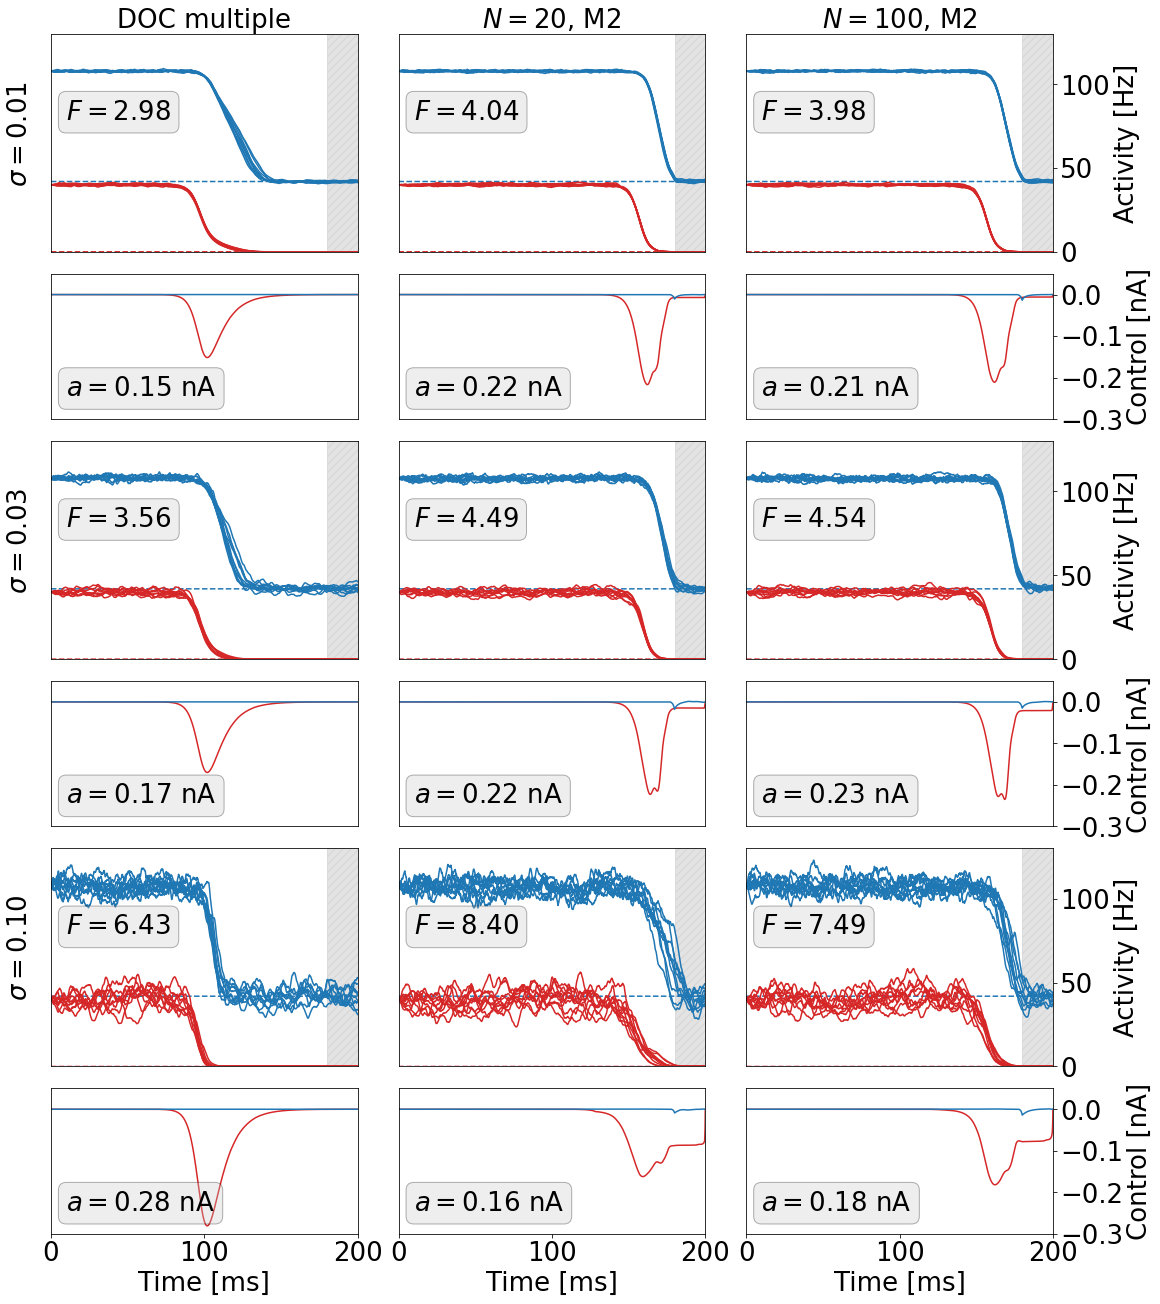

In [41]:
fs_ = 26
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
#fig.suptitle('Point b', fontsize=fs_)
plot_realizations = 10
i = 50

t_array = np.arange(0,dur+aln.params.dt,aln.params.dt)
ax[0,0].set_title('DOC multiple', fontsize=fs_)

setinit(initVars[i], aln)
aln.params.duration = dur
target_ = aln.getZeroTarget()

for i_sigma in range(3):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations) + ', M2', fontsize=fs_)

        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,0,100:-100]/5., color=exc_red)
        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,1,100:-100]/5., color=inh_blue)
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=control_[i_sigma][i_noise][:,:,100:-100])
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue)

        ax[2*i_sigma,i_noise].text(0.05, 0.7, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.3, r'$a = $' + '{:.2f} nA'.format(
            np.amax(np.abs(control_[i_sigma][i_noise][0,0,100:-100]/5.))), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)

for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,130)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.3,0.05)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,140,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.3,0.01,0.1))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()


filename_ = nb[:-6] + '.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()

In [34]:
aln.params.duration = dur
setinit(initVars[i], aln)
#cost_final_mean = np.zeros(( 3,3 ))

for i_sigma in range(len(sigma_ou_array)):
    for i_noise in range(len(noise_realizations_array)):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue
            
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou

        init_control = aln.getZeroControl()           
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = 0.
        cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

        cost_final_mean[i_sigma, i_noise] = cs + cost_final / noise_realizations_final
        print('mean = ', cost_final_mean[i_sigma, i_noise])

mean =  2.9831941456277313
mean =  3.9647080215490647
mean =  4.087918656101022
mean =  3.560656859788772
mean =  4.600245784633076
mean =  4.537958084835247
mean =  6.429638155005763
mean =  6.287734939065926
mean =  6.711662620932783


In [42]:
n_noise = 3
control_1 = [ [None] * n_noise, [None] * n_noise, [None] * n_noise ]

In [43]:
for i_sigma in range(3):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in [1,2]:
        
        if i_sigma in []:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        zero_init = aln.getZeroControl()
        print(noise_realizations)

        setinit(initVars[i], aln)

        bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
            zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
            tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
            t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
            control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
            noise_real=noise_realizations, init_params = initVars[i], method='M2')

        control_init = bestControl[:,:,100:-100].copy()
        setinit(initVars, aln)
        aln.params.duration = dur

        bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
            control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
            tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
            t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
            control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
            noise_real=noise_realizations, init_params = initVars[i],method='M2')

        control_1[i_sigma][i_noise] = bestControl.copy()

set cost params:  0.052145270361592284 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  3083.067676692498
Gradient descend method:  None
RUN  1 , total integrated cost =  27.511551492425987
RUN  2 , total integrated cost =  9.597717536407945
RUN  3 , total integrated cost =  5.495854165415732
RUN  3 , total integrated cost mean =  5.495854165415732
Improved over  3  iterations in  8.154051456018351  seconds by  99.82174072249651  percent.
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  5.40893294615341
Gradient descend method:  None
step size too small or too large
step size too small or too large
RUN  1 , total integrated cost =  5.017988049289667
step size too small or too large
RUN  2 , total integrated cost =  4.7626852912519535
RUN  3 , total integrated cost =  4.5751648411687125
RUN  4 , total integrated cost =  4.442603506016285
step size too small or too large
step size too small or too large
RUN  5 , total integrated co

step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  4.536575695509079
step size too small or too large
step size too small or too large
step size too small or too large
RUN  8 , total integrated cost =  4.468542638227172
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  9 , total integrated cost =  4.431237607634517
step size too small or too large
step size too small or too large
step size too small

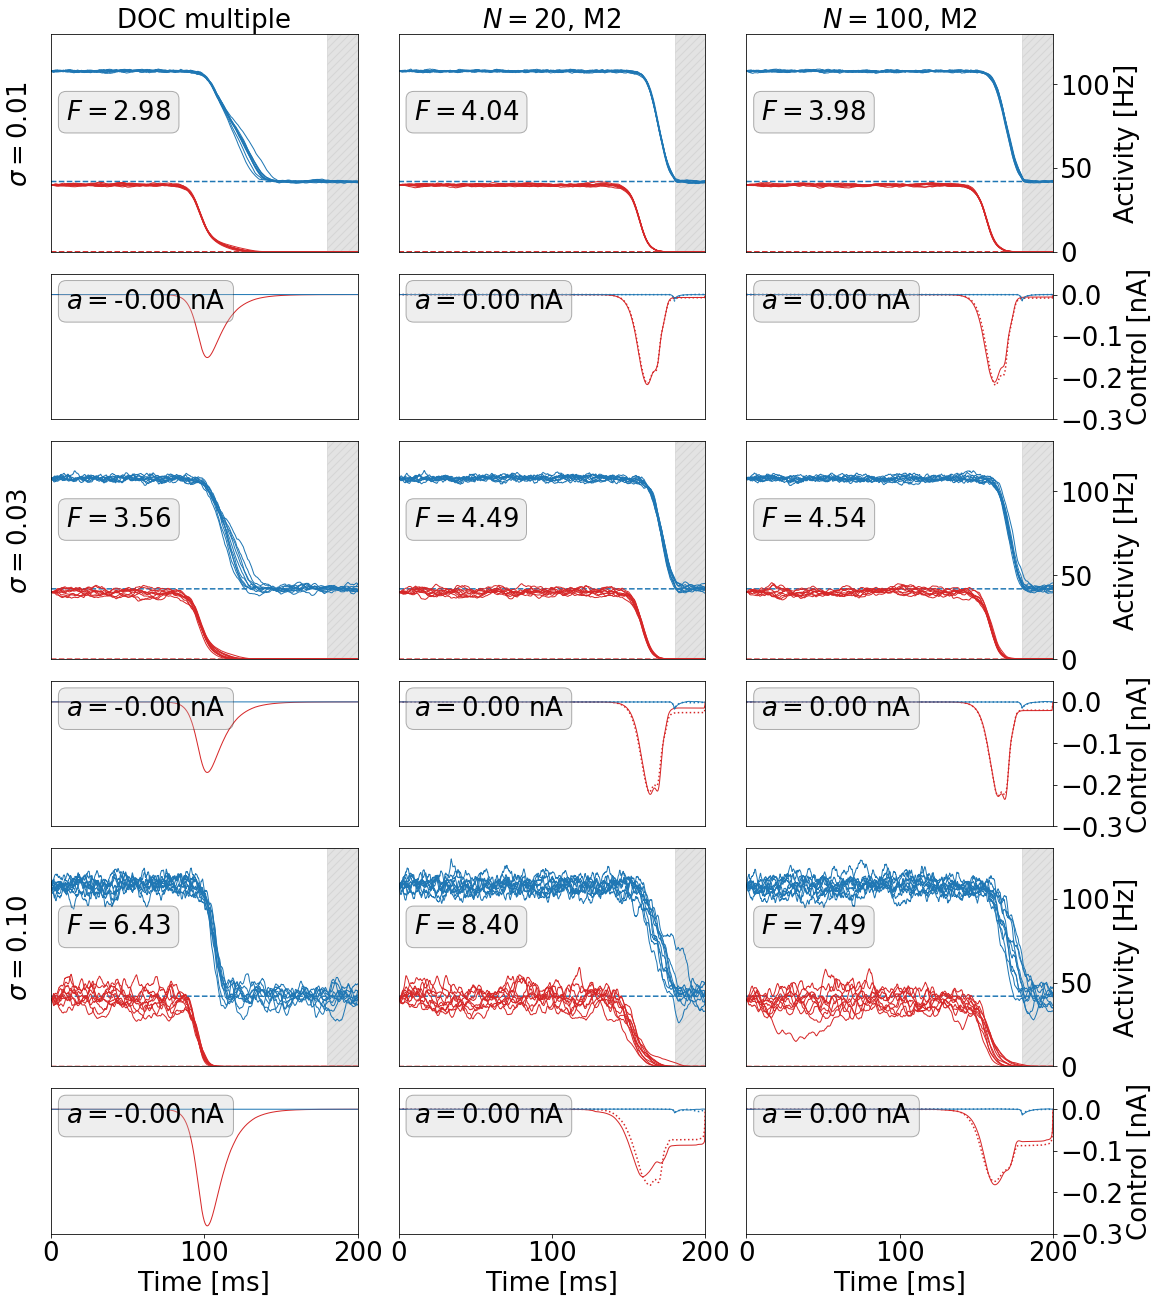

In [45]:
fs_ = 26
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
#fig.suptitle('Point b', fontsize=fs_)
plot_realizations = 10
i = 50

t_array = np.arange(0,dur+aln.params.dt,aln.params.dt)
ax[0,0].set_title('DOC multiple', fontsize=fs_)

setinit(initVars[i], aln)
aln.params.duration = dur
target_ = aln.getZeroTarget()

for i_sigma in range(3):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations) + ', M2', fontsize=fs_)
            ax[2*i_sigma+1,i_noise].plot( t_array, control_1[i_sigma][i_noise][0,0,100:-100]/5.,
                                         color=exc_red, linestyle='dotted')
            ax[2*i_sigma+1,i_noise].plot( t_array, control_1[i_sigma][i_noise][0,1,100:-100]/5.,
                                         color=inh_blue, linestyle='dotted')

        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,0,100:-100]/5.,
                                     color=exc_red, linewidth=1)
        ax[2*i_sigma+1,i_noise].plot( t_array, control_[i_sigma][i_noise][0,1,100:-100]/5.,
                                     color=inh_blue, linewidth=1)
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=control_[i_sigma][i_noise][:,:,100:-100])
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red, linewidth=1)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue, linewidth=1)

        ax[2*i_sigma,i_noise].text(0.05, 0.7, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            np.amax(control_[i_sigma][i_noise][0,0,100:-100]/5.)), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)

for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,130)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.3,0.05)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,140,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.3,0.01,0.1))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()


filename_ = nb[:-6] + '_1.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()